In [1]:
#suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA, IncrementalPCA

In [4]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [6]:
from fancyimpute import IterativeImputer
from fancyimpute import KNN

In [7]:
import random

In [8]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_seq_items', 200)

# <font color=blue>1. Data Loading & Inspection</font>

Below commented code snippet can be used if Google Colab is used for execution

In [9]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [10]:
#filename = "gdrive/My Drive/Colab/Telecom Churn Case Study/telecom_churn_data.csv"

# finding the total number of rows in the file without loading the file
#num_lines = sum(1 for l in open(filename))

#Sample size: 20%

#size = int(num_lines//5)
#print(size)

#random.seed(100)
#skip_id = random.sample(range(1, num_lines), num_lines-size)

#df = pd.read_csv(filename, skiprows = skip_id)
#df.shape

In [11]:
#df = pd.read_csv('gdrive/My Drive/Colab/Telecom Churn Case Study/telecom_churn_data.csv')
df = pd.read_csv('telecom_churn_data.csv')
df.shape

(99999, 226)

## 1.1 Data Cleaning

We will get rid of all the columns that do not have even 30% of data, i.e. 70% of missing values.

In [12]:
#Drop all the columns which has 30% or less values, i.e. columns with 70% or more missing values
print(df.shape)
df.dropna(axis=1, thresh= 0.3*len(df), inplace=True)
print(df.shape)

(99999, 226)
(99999, 186)


In [13]:
#checking missing values
np.round(df.isnull().mean()[df.isnull().mean()!=0].sort_values(ascending=False) * 100, 2)

loc_og_t2m_mou_9        7.75
roam_ic_mou_9           7.75
loc_og_t2f_mou_9        7.75
loc_ic_t2m_mou_9        7.75
loc_ic_mou_9            7.75
                        ... 
last_date_of_month_8    1.10
loc_ic_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_og_t2o_mou          1.02
last_date_of_month_7    0.60
Length: 126, dtype: float64

In [14]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 141.9+ MB


Convert all date features to datetime format.

In [16]:
df['last_date_of_month_6'] = pd.to_datetime(df['last_date_of_month_6'], infer_datetime_format=True)
df['last_date_of_month_7'] = pd.to_datetime(df['last_date_of_month_7'], infer_datetime_format=True)
df['last_date_of_month_8'] = pd.to_datetime(df['last_date_of_month_8'], infer_datetime_format=True)
df['last_date_of_month_9'] = pd.to_datetime(df['last_date_of_month_9'], infer_datetime_format=True)

In [17]:
df['date_of_last_rech_6'] = pd.to_datetime(df['date_of_last_rech_6'], infer_datetime_format=True)
df['date_of_last_rech_7'] = pd.to_datetime(df['date_of_last_rech_7'], infer_datetime_format=True)
df['date_of_last_rech_8'] = pd.to_datetime(df['date_of_last_rech_8'], infer_datetime_format=True)
df['date_of_last_rech_9'] = pd.to_datetime(df['date_of_last_rech_9'], infer_datetime_format=True)

In all the below date columns, as we cannot do anything with date as such, we will hold only the day of the month which would be useful in analysis & modeling. Thereby converting the date column to numeric as well.

In [18]:
df['date_of_last_rech_6'] = df['date_of_last_rech_6'].dt.day
df['date_of_last_rech_7'] = df['date_of_last_rech_7'].dt.day
df['date_of_last_rech_8'] = df['date_of_last_rech_8'].dt.day
df['date_of_last_rech_9'] = df['date_of_last_rech_9'].dt.day

In [19]:
df.rename(columns={'date_of_last_rech_6':'day_of_last_rech_6', 'date_of_last_rech_7':'day_of_last_rech_7', 'date_of_last_rech_8':'day_of_last_rech_8', 'date_of_last_rech_9':'day_of_last_rech_9'}, inplace=True)

In [20]:
df.rename(columns={'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g':'vbc_3g_8', 'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to vbc_3g_9
dtypes: datetime64[ns](4), float64(147), int64(35)
memory usage: 141.9 MB


In [22]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0           2014-06-30           2014-07-31           2014-08-31   
1           2014-06-30           2014-07-31           2014-08-31   
2           2014-06-30           2014-07-31           2014-08-31   
3           2014-06-30           2014-07-31           2014-08-31   
4           2014-06-30           2014-07-31           2014-08-31   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0           2014-09-30  197.385  214.816  213.803   21.100          NaN   
1           2014-09-30   34.047  355.074  268.321   86.285        24.11   
2           2014-09-30  167.690  189.058  210.226  290.714        11.54   
3           2014-09-30  221.338  251.102  508.054  389.500        99.91   
4           2014-09-30  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [23]:
len(np.round(df.isnull().mean()[df.isnull().mean() < 0.03].sort_values(ascending=False) * 100, 2))

68

In [24]:
df.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

All the below features have no significance towards the analysis or model prediction, hence dropping all these columns.

In [25]:
print(df.shape)
df.drop(['mobile_number','circle_id', 'last_date_of_month_6',	'last_date_of_month_7',	'last_date_of_month_8',	'last_date_of_month_9'], axis=1, inplace=True)
print(df.shape)

(99999, 186)
(99999, 180)


In [26]:
df.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  197.385  214.816  213.803   
1             0.0             0.0             0.0   34.047  355.074  268.321   
2             0.0             0.0             0.0  167.690  189.058  210.226   
3             0.0             0.0             0.0  221.338  251.102  508.054   
4             0.0             0.0             0.0  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  \
0   21.100          NaN          NaN         0.00          NaN           NaN   
1   86.285        24.11        78.68         7.68        18.34         15.74   
2  290.714        11.54        55.24        37.26        74.81        143.33   
3  389.500        99.91        54.39       310.98       241.71        123.31   
4  163.426        50.31       149.44        83.89        58.78         76.96   

   offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
0           NaN          0.00           NaN            NaN            NaN   
1         99.84        304.76         53.76            0.0           0.00   
2        220.59        208.36        118.91            0.0           0.00   
3        109.01         71.68        113.54            0.0          54.86   
4         91.88        124.26         45.81            0.0           0.00   

   roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00            NaN            NaN            NaN           0.00   
1           0.00           0.00            0.0           0.00           0.00   
2           0.00          38.49            0.0           0.00           0.00   
3          44.38           0.00            0.0          28.09          39.04   
4           0.00           0.00            0.0           0.00           0.00   

   roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0            NaN               NaN               NaN              0.00   
1           0.00             23.88             74.56              7.68   
2          70.94              7.19             28.74             13.58   
3           0.00             73.68             34.81             10.61   
4           0.00             50.31            149.44             83.89   

   loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
0               NaN               NaN               NaN              0.00   
1             18.34             11.51             75.94            291.86   
2             14.39             29.34             16.86             38.46   
3             15.49            107.43             83.21             22.46   
4             58.78             67.64             91.88            124.26   

   loc_og_t2m_mou_9  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               NaN               NaN               NaN              0.00   
1             53.76              0.00              0.00              0.00   
2             28.16             24.11             21.79             15.61   
3             65.46              1.91              0.65              4.91   
4             37.89              0.00              0.00              0.00   

   loc_og_t2f_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               NaN               NaN               NaN              0.00   
1              0.00               0.0              2.91              0.00   
2             22.24               0.0            135.54             45.76   
3              2.06               0.0              0.00              0.00   
4              1.93               0.0              0.00              0.00   

   loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  \
0               NaN           NaN           NaN          0.00           NaN   
1              0.00         35.39        150.51        299.54         72.11   
2              0.48       

Any features which has skewed with one category or value won't add any significance to the model. Hence, we will get rid of all the variables that have skewed 97% towards one category or value.

In [27]:
#Fetch the value counts of each column, identify whether the top item has more than 97% density, if so, drop the column
for col in df.columns:
    if(df[col].value_counts(normalize=True).reset_index().iloc[0,:].values[1] > 0.97):
        #print(df[col].value_counts(normalize=True))
        df.drop(col, axis=1, inplace=True)
        print('Dropped the column: ', col)

Dropped the column:  loc_og_t2o_mou
Dropped the column:  std_og_t2o_mou
Dropped the column:  loc_ic_t2o_mou
Dropped the column:  std_og_t2c_mou_6
Dropped the column:  std_og_t2c_mou_7
Dropped the column:  std_og_t2c_mou_8
Dropped the column:  std_og_t2c_mou_9
Dropped the column:  og_others_7
Dropped the column:  og_others_8
Dropped the column:  og_others_9
Dropped the column:  std_ic_t2o_mou_6
Dropped the column:  std_ic_t2o_mou_7
Dropped the column:  std_ic_t2o_mou_8
Dropped the column:  std_ic_t2o_mou_9


In [28]:
df.shape

(99999, 166)

In [29]:
df.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100          NaN          NaN         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0            NaN           0.00            NaN               NaN   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0               NaN              0.00               NaN               NaN   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0               NaN              0.00               NaN           NaN   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00              0.00              0.00        183.03   
4              0.00              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN          0.00           NaN               NaN   
1        150.51        299.54         72.11              0.23   
2         67.41         67.66         64.81              4.34   
3        118.68         37.99         83.03             26.23   
4        241.33        208.16      

## 1.2 Identifying Categorical Features

All the below variables are found to be categorical but stored as numeric values.

In [30]:
catFeatures = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'monthly_3g_9', 
               'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_2g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'sachet_3g_9']

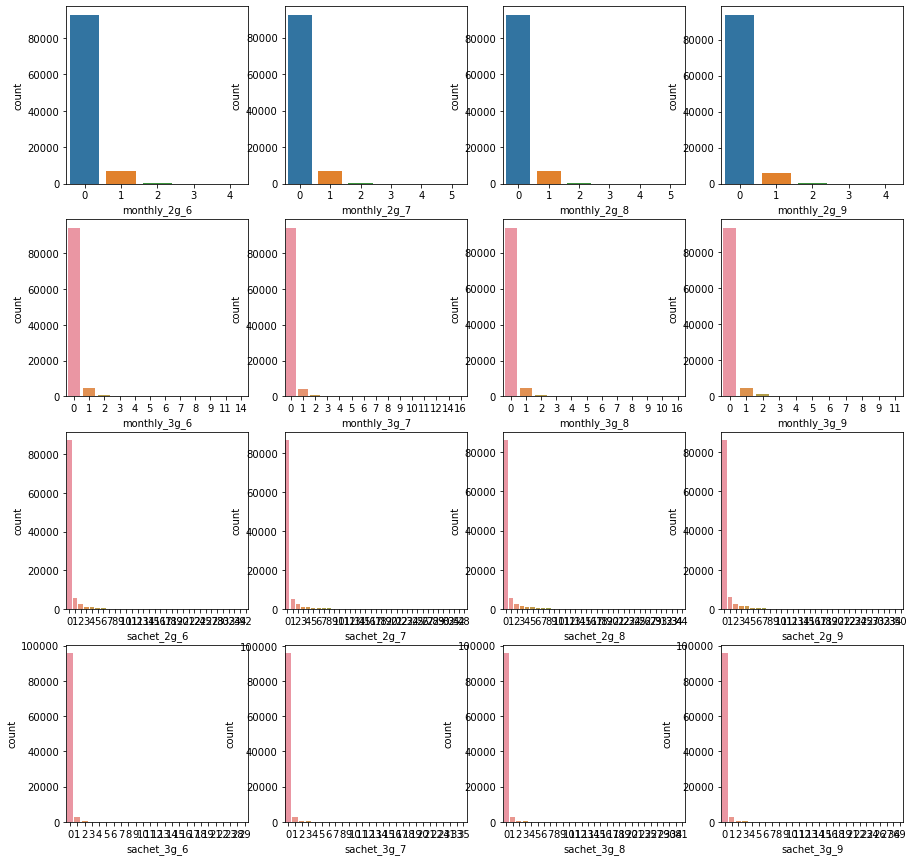

In [31]:
plt.figure(figsize=(15,15))
i = 1
for item in catFeatures:
    plt.subplot(4,4,i)
    sns.countplot(df[item])
    i += 1
plt.show()

As it would be difficult to create dummy variables for so many levels of categories, we will first bin the features (categorise into few levels) and later we will dummify.

In [32]:
for i in range(len(catFeatures)):
  if i<4:
    df[catFeatures[i]] = pd.cut(df[catFeatures[i]], [-1,0,3,10], labels = ['No_Usage', 'Avg_Usage', 'High_Usage'])
  elif i>=4 and i<8:
    df[catFeatures[i]] = pd.cut(df[catFeatures[i]], [-1,0,4,20], labels = ['No_Usage', 'Avg_Usage', 'High_Usage'])
  if i>=8 and i<12:
    df[catFeatures[i]] = pd.cut(df[catFeatures[i]], [-1,0,5,14,50], labels = ['No_Usage', 'Low_Usage', 'Avg_Usage', 'High_Usage'])
  elif i>=12:
    df[catFeatures[i]] = pd.cut(df[catFeatures[i]], [-1,0,2,8,50], labels = ['No_Usage', 'Low_Usage', 'Avg_Usage', 'High_Usage'])

In [33]:
df[catFeatures].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   monthly_2g_6  99999 non-null  category
 1   monthly_2g_7  99999 non-null  category
 2   monthly_2g_8  99999 non-null  category
 3   monthly_2g_9  99999 non-null  category
 4   monthly_3g_6  99999 non-null  category
 5   monthly_3g_7  99999 non-null  category
 6   monthly_3g_8  99999 non-null  category
 7   monthly_3g_9  99999 non-null  category
 8   sachet_2g_6   99999 non-null  category
 9   sachet_2g_7   99999 non-null  category
 10  sachet_2g_8   99999 non-null  category
 11  sachet_2g_9   99999 non-null  category
 12  sachet_3g_6   99999 non-null  category
 13  sachet_3g_7   99999 non-null  category
 14  sachet_3g_8   99999 non-null  category
 15  sachet_3g_9   99999 non-null  category
dtypes: category(16)
memory usage: 1.5 MB


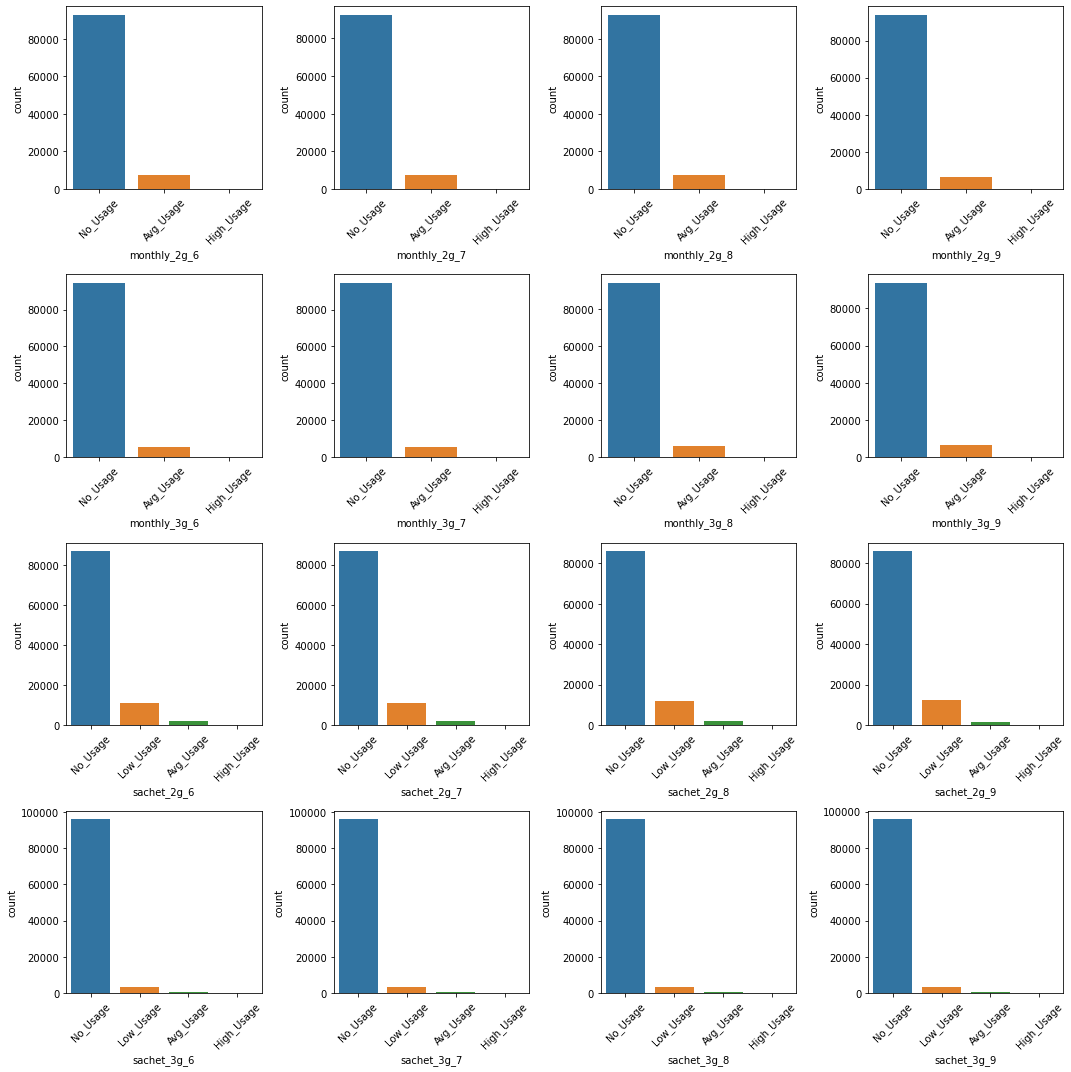

In [34]:
plt.figure(figsize=(15,15))
i = 1
for item in catFeatures:
    plt.subplot(4,4,i)
    sns.countplot(df[item])
    plt.xticks(rotation = 45)
    i += 1
plt.tight_layout()
plt.show()

## 1.3 Creating Dummy Variables for Categorical Features

In [35]:
dummy = pd.get_dummies(df[catFeatures])
dummy.shape

(99999, 56)

We will drop the last dummy variable instead of first one as the first dummy variable holds lot of data.

In [36]:
dummy.drop(dummy.filter(regex='_High_Usage$', axis=1).columns, axis=1, inplace=True)
dummy.shape

(99999, 40)

In [37]:
dummy.head()

monthly_2g_6_No_Usage  monthly_2g_6_Avg_Usage  monthly_2g_7_No_Usage  \
0                      1                       0                      1   
1                      1                       0                      0   
2                      1                       0                      1   
3                      1                       0                      1   
4                      1                       0                      1   

   monthly_2g_7_Avg_Usage  monthly_2g_8_No_Usage  monthly_2g_8_Avg_Usage  \
0                       0                      1                       0   
1                       1                      1                       0   
2                       0                      1                       0   
3                       0                      1                       0   
4                       0                      1                       0   

   monthly_2g_9_No_Usage  monthly_2g_9_Avg_Usage  monthly_3g_6_No_Usage  \
0                      1                       0                      0   
1                      1                       0                      1   
2                      1                       0                      1   
3                      1                       0                      1   
4                      1                       0                      1   

   monthly_3g_6_Avg_Usage  monthly_3g_7_No_Usage  monthly_3g_7_Avg_Usage  \
0                       1                      0                       1   
1                       0                      1                       0   
2                       0                      1                       0   
3                       0                      1                       0   
4                       0                      1                       0   

   monthly_3g_8_No_Usage  monthly_3g_8_Avg_Usage  monthly_3g_9_No_Usage  \
0                      0                       1                      1   
1                      1                       0                      1   
2                      1                       0                      1   
3                      1                       0                      1   
4                      1                       0                      1   

   monthly_3g_9_Avg_Usage  sachet_2g_6_No_Usage  sachet_2g_6_Low_Usage  \
0                       0                     1                      0   
1                       0                     1                      0   
2                       0                     1                      0   
3                       0                     1                      0   
4                       0                     0                      1   

   sachet_2g_6_Avg_Usage  sachet_2g_7_No_Usage  sachet_2g_7_Low_Usage  \
0                      0                     1                      0   
1                      0                     1                      0   
2                      0                     1                      0   
3                      0                     1                      0   
4                      0                     1                      0   

   sachet_2g_7_Avg_Usage  sachet_2g_8_No_Usage  sachet_2g_8_Low_Usage  \
0                      0                     1                      0   
1                      0                     0                      1   
2                      0                     1                      0   
3                      0                     1                      0   
4                      0                     1                      0   

   sachet_2g_8_Avg_Usage  sachet_2g_9_No_Usage  sachet_2g_9_Low_Usage  \
0                      0                     1                      0   
1                      0                     1                      0   
2                      0                     0                      1   
3                      0                     1                      0   
4                      0                     1  

In [38]:
print(df.shape)
df.drop(catFeatures, axis=1, inplace=True)
print(df.shape)

(99999, 166)
(99999, 150)


In [39]:
df = pd.concat([df, dummy], axis=1)

In [40]:
df.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100          NaN          NaN         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0          NaN           NaN           NaN          0.00           NaN   
1        18.34         15.74         99.84        304.76         53.76   
2        74.81        143.33        220.59        208.36        118.91   
3       241.71        123.31        109.01         71.68        113.54   
4        58.78         76.96         91.88        124.26         45.81   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0            NaN            NaN           0.00            NaN            NaN   
1            0.0           0.00           0.00           0.00            0.0   
2            0.0           0.00           0.00          38.49            0.0   
3            0.0          54.86          44.38           0.00            0.0   
4            0.0           0.00           0.00           0.00            0.0   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0            NaN           0.00            NaN               NaN   
1           0.00           0.00           0.00             23.88   
2           0.00           0.00          70.94              7.19   
3          28.09          39.04           0.00             73.68   
4           0.00           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             18.34             11.51   
2             28.74             13.58             14.39             29.34   
3             34.81             10.61             15.49            107.43   
4            149.44             83.89             58.78             67.64   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0               NaN              0.00               NaN               NaN   
1             75.94            291.86             53.76              0.00   
2             16.86             38.46             28.16             24.11   
3             83.21             22.46             65.46              1.91   
4             91.88            124.26             37.89              0.00   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0               NaN              0.00               NaN               NaN   
1              0.00              0.00              0.00               0.0   
2             21.79             15.61             22.24               0.0   
3              0.65              4.91              2.06               0.0   
4              0.00              0.00              1.93               0.0   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0               NaN              0.00               NaN           NaN   
1              2.91              0.00              0.00         35.39   
2            135.54             45.76              0.48         60.66   
3              0.00              0.00              0.00        183.03   
4              0.00              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN          0.00           NaN               NaN   
1        150.51        299.54         72.11              0.23   
2         67.41         67.66         64.81              4.34   
3        118.68         37.99         83.03             26.23   
4        241.33        208.16      

# <font color=blue>2. Data Imputation & Outlier Treatment</font>

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 190 entries, arpu_6 to sachet_3g_9_Avg_Usage
dtypes: float64(133), int64(17), uint8(40)
memory usage: 118.3 MB


In [42]:
df_num = df.select_dtypes(include=['int64', 'float64'])
df_binary = df.select_dtypes(include=['uint8'])
df_int = df.select_dtypes(include=['int64'])
df_float = df.select_dtypes(include=['float64'])
df_dt = df.select_dtypes(include=['datetime64[ns]'])
print(df_num.shape)
print(df_binary.shape)
print(df_int.shape)
print(df_float.shape)
print(df_dt.shape)

(99999, 150)
(99999, 40)
(99999, 17)
(99999, 133)
(99999, 0)


## 2.1 Data Imputation

We will use the fancyimpute method to impute the missing values in the dataframe instead of manual mean or median imputation for more accuarte imputation.

In [43]:
fancy = IterativeImputer()

In [44]:
np.round(df_num.isnull().mean()[df_num.isnull().mean() != 0].sort_values(ascending=False) * 100, 2)

std_og_mou_9          7.75
roam_og_mou_9         7.75
loc_ic_mou_9          7.75
loc_og_t2c_mou_9      7.75
std_ic_t2t_mou_9      7.75
                      ... 
std_og_t2f_mou_7      3.86
std_ic_mou_7          3.86
day_of_last_rech_8    3.62
day_of_last_rech_7    1.77
day_of_last_rech_6    1.61
Length: 109, dtype: float64

In [45]:
#scaling using MinMax Scaler
scaler = MinMaxScaler()

In [46]:
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns = df.columns

In [47]:
#df.to_csv('gdrive/My Drive/Colab Notebooks/Before_Impute.csv')

In [48]:
df_imputed = pd.DataFrame(fancy.fit_transform(df_scaled))

In [49]:
#df_imputed.to_csv('gdrive/My Drive/Colab Notebooks/After_Impute.csv')

In [51]:
df_scaled.head()

arpu_6    arpu_7    arpu_8    arpu_9  onnet_mou_6  onnet_mou_7  \
0  0.081898  0.059980  0.033622  0.047183          NaN          NaN   
1  0.076451  0.063755  0.035203  0.048785     0.003268     0.009645   
2  0.080907  0.059287  0.033518  0.053807     0.001564     0.006771   
3  0.082696  0.060957  0.042154  0.056234     0.013544     0.006667   
4  0.084040  0.062538  0.034329  0.050680     0.006820     0.018319   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0     0.000000          NaN           NaN           NaN      0.000000   
1     0.000714     0.001759      0.001882      0.010328      0.021757   
2     0.003465     0.007174      0.017140      0.022819      0.014875   
3     0.028921     0.023180      0.014746      0.011276      0.005117   
4     0.007802     0.005637      0.009203      0.009504      0.008871   

   offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
0           NaN            NaN            NaN       0.000000            NaN   
1      0.005214            0.0       0.000000       0.000000       0.000000   
2      0.011533            0.0       0.000000       0.000000       0.004547   
3      0.011012            0.0       0.003569       0.003389       0.000000   
4      0.004443            0.0       0.000000       0.000000       0.000000   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN       0.000000            NaN   
1            0.0       0.000000       0.000000       0.000000   
2            0.0       0.000000       0.000000       0.016019   
3            0.0       0.009989       0.007315       0.000000   
4            0.0       0.000000       0.000000       0.000000   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN          0.000000               NaN   
1          0.003713          0.010075          0.000714          0.001765   
2          0.001118          0.003883          0.001263          0.001385   
3          0.011456          0.004704          0.000987          0.001491   
4          0.007823          0.020193          0.007802          0.005658   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN          0.000000               NaN   
1          0.002434          0.016664          0.058827          0.012136   
2          0.006203          0.003700          0.007752          0.006357   
3          0.022714          0.018259          0.004527          0.014777   
4          0.014301          0.020162          0.025046          0.008553   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN          0.000000               NaN   
1          0.000000          0.000000          0.000000          0.000000   
2          0.016446          0.018213          0.016812          0.023981   
3          0.001303          0.000543          0.005288          0.002221   
4          0.000000          0.000000          0.000000          0.002081   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               NaN               NaN          0.000000               NaN   
1               0.0          0.003176          0.000000          0.000000   
2               0.0          0.147931          0.091139          0.001412   
3               0.0          0.000000          0.000000          0.000000   
4               0.0          0.000000          0.000000          0.000000   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0           NaN           NaN      0.000000           NaN               NaN   
1      0.003325      0.019611      0.027132      0.006497          0.000031   
2      0.005699      0.008783      0.006129      0.005839          0.000589   
3      0.017197      0.015464      0.003441      0.007481          0.003561   
4      0.011083      0.031

In [52]:
df_imputed.head()

0         1         2         3         4         5         6  \
0  0.081898  0.059980  0.033622  0.047183 -0.013545  0.008640  0.000000   
1  0.076451  0.063755  0.035203  0.048785  0.003268  0.009645  0.000714   
2  0.080907  0.059287  0.033518  0.053807  0.001564  0.006771  0.003465   
3  0.082696  0.060957  0.042154  0.056234  0.013544  0.006667  0.028921   
4  0.084040  0.062538  0.034329  0.050680  0.006820  0.018319  0.007802   

          7         8         9        10        11        12        13  \
0  0.001062  0.019499  0.002858  0.000000  0.000226  0.015921  0.006267   
1  0.001759  0.001882  0.010328  0.021757  0.005214  0.000000  0.000000   
2  0.007174  0.017140  0.022819  0.014875  0.011533  0.000000  0.000000   
3  0.023180  0.014746  0.011276  0.005117  0.011012  0.000000  0.003569   
4  0.005637  0.009203  0.009504  0.008871  0.004443  0.000000  0.000000   

         14        15        16        17        18        19        20  \
0  0.000000  0.003808  0.013744  0.002029  0.000000 -0.006538 -0.014793   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.003713   
2  0.000000  0.004547  0.000000  0.000000  0.000000  0.016019  0.001118   
3  0.003389  0.000000  0.000000  0.009989  0.007315  0.000000  0.011456   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.007823   

         21        22        23        24        25        26        27  \
0  0.006302  0.000000  0.004344  0.020744  0.020266  0.000000  0.020843   
1  0.010075  0.000714  0.001765  0.002434  0.016664  0.058827  0.012136   
2  0.003883  0.001263  0.001385  0.006203  0.003700  0.007752  0.006357   
3  0.004704  0.000987  0.001491  0.022714  0.018259  0.004527  0.014777   
4  0.020193  0.007802  0.005658  0.014301  0.020162  0.025046  0.008553   

         28        29        30        31        32        33        34  \
0  0.005343  0.003462  0.000000  0.004199  0.027359 -0.042690  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.003176  0.000000   
2  0.016446  0.018213  0.016812  0.023981  0.000000  0.147931  0.091139   
3  0.001303  0.000543  0.005288  0.002221  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.002081  0.000000  0.000000  0.000000   

         35        36        37        38        39        40        41  \
0 -0.076369  0.001007  0.018650  0.000000  0.012736  0.002460  0.010303   
1  0.000000  0.003325  0.019611  0.027132  0.006497  0.000031  0.000505   
2  0.001412  0.005699  0.008783  0.006129  0.005839  0.000589  0.003257   
3  0.000000  0.017197  0.015464  0.003441  0.007481  0.003561  0.001831   
4  0.000000  0.011083  0.031445  0.018855  0.008884  0.000000  0.000000   

         42        43        44        45        46        47        48  \
0  0.000000  0.008817  0.010279  0.009763  0.000000  0.008427  0.011427   
1  0.000000  0.000000  0.000000  0.000050  0.000009  0.000000  0.000000   
2  0.002817  0.000934  0.005028  0.007260  0.005414  0.000908  0.002355   
3  0.036132  0.024110  0.000360  0.000186  0.000468  0.000977  0.000000   
4  0.000000  0.000000  0.001120  0.000000  0.000000  0.000000  0.000000   

         49        50       51        52        53        54        55  \
0  0.002824  0.000000  0.00196  0.013134  0.016093  0.000000  0.014829   
1  0.000000  0.000000  0.00000  0.000027  0.000419  0.000009  0.000000   
2  0.027101  0.044166  0.00000  0.005649  0.009937  0.008651  0.001569   
3  0.000000  0.000000  0.00000  0.003466  0.001521  0.021181  0.020548   
4  0.000000  0.000000  0.00000  0.001104  0.000000  0.000000  0.000000   

         56        57   58        59        60        61        62        63  \
0 -0.021839 -0.037512  0.0 -0.038056  0.006825 -0.047267  0.000000 -0.088492   
1  0.000000  0.000000  0.0  0.000000  0.004574  0.009876  0.009174  0.000000   
2  0.000000  0.000000  0.0  0.000000  0.045504  0.099827  0.069625  0.025726   
3  0.000000  0.000000  0.0  0.000000  0.010711  0.000000  0.013006  0.026466   
4  0.000

In [53]:
df_imputed_actual = pd.DataFrame(scaler.inverse_transform(df_imputed))
df_imputed_actual.columns = df.columns
df_imputed_actual.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100   -99.914884    70.480136         0.00   
1   34.047  355.074  268.321   86.285    24.110000    78.680000         7.68   
2  167.690  189.058  210.226  290.714    11.540000    55.240000        37.26   
3  221.338  251.102  508.054  389.500    99.910000    54.390000       310.98   
4  261.636  309.876  238.174  163.426    50.310000   149.440000        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
0    11.074024    163.058009     27.628451          0.00      2.333011   
1    18.340000     15.740000     99.840000        304.76     53.760000   
2    74.810000    143.330000    220.590000        208.36    118.910000   
3   241.710000    123.310000    109.010000         71.68    113.540000   
4    58.780000     76.960000     91.880000        124.26     45.810000   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
0     218.505581      96.325503           0.00      32.232428      51.884367   
1       0.000000       0.000000           0.00       0.000000       0.000000   
2       0.000000       0.000000           0.00      38.490000       0.000000   
3       0.000000      54.860000          44.38       0.000000       0.000000   
4       0.000000       0.000000           0.00       0.000000       0.000000   

   roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
0       5.706878           0.00      -28.95239        -95.138804   
1       0.000000           0.00        0.00000         23.880000   
2       0.000000           0.00       70.94000          7.190000   
3      28.090000          39.04        0.00000         73.680000   
4       0.000000           0.00        0.00000         50.310000   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
0         46.640159              0.00         45.133444         98.112132   
1         74.560000              7.68         18.340000         11.510000   
2         28.740000             13.58         14.390000         29.340000   
3         34.810000             10.61         15.490000        107.430000   
4        149.440000             83.89         58.780000         67.640000   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
0          92.35381              0.00          92.33361          7.833121   
1          75.94000            291.86          53.76000          0.000000   
2          16.86000             38.46          28.16000         24.110000   
3          83.21000             22.46          65.46000          1.910000   
4          91.88000            124.26          37.89000          0.000000   

   loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  loc_og_t2c_mou_6  \
0          4.142093              0.00          3.894015          9.380433   
1          0.000000              0.00          0.000000          0.000000   
2         21.790000             15.61         22.240000          0.000000   
3          0.650000              4.91          2.060000          0.000000   
4          0.000000              0.00          1.930000          0.000000   

   loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  \
0        -39.114549              0.00        -25.953155      10.71651   
1          2.910000              0.00          0.000000      35.39000   
2        135.540000             45.76          0.480000      60.66000   
3          0.000000              0.00          0.000000     183.03000   
4          0.000000              0.00          0.000000     117.96000   

   loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0    143.134497          0.00    141.362597         18.119425   
1    150.510000        299.54     72.110000          0.230000   
2     67.410000         67.66     64.810000          4.340000   
3    118.680000         37.99     83.030000         26.230000   
4    241.330000        208.16     9

In [54]:
df.describe()

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  96062.000000   
mean     282.987358    278.536648    279.154731    261.645069    132.395875   
std      328.439770    338.156291    344.474791    341.998630    297.207406   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
25%       93.411500     86.980500     84.126000     62.685000      7.380000   
50%      197.704000    191.640000    192.080000    176.849000     34.310000   
75%      371.060000    365.344500    369.370500    353.466500    118.740000   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  96140.000000  94621.000000  92254.000000  96062.000000  96140.000000   
mean     133.670805    133.018098    130.302327    197.935577    197.045133   
std      308.794148    308.951589    308.477668    316.851613    325.862803   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.660000      6.460000      5.330000     34.730000     32.190000   
50%       32.330000     32.360000     29.840000     96.310000     91.735000   
75%      115.595000    115.860000    112.130000    231.860000    226.815000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  94621.000000  92254.000000   96062.000000   96140.000000   
mean     196.574803    190.337222       9.950013       7.149898   
std      327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000       0.000000       0.000000   
25%       31.630000     27.130000       0.000000       0.000000   
50%       92.140000     87.290000       0.000000       0.000000   
75%      228.260000    220.505000       0.000000       0.000000   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      94621.000000      92254.000000      96062.000000      96140.000000   
mean          45.887806         44.584446         93.342088         91.397131   
std          151.184830        147.995390        162.780544        157.492308   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.600000          1.360000          9.880000         10.025000   
50%           11.730000         11.260000         41.030000         40.430000   
75%           40.110000         39.280000        110.390000        107.560000   
max        10752.560000      10389.2400

In [55]:
df_imputed_actual.describe()

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     282.987358    278.536648    279.154731    261.645069    123.280891   
std      328.439770    338.156291    344.474791    341.998630    294.757991   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000   -163.937029   
25%       93.411500     86.980500     84.126000     62.685000      5.430000   
50%      197.704000    191.640000    192.080000    176.849000     30.980000   
75%      371.060000    365.344500    369.370500    353.466500    112.610000   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     131.203479    126.627120    121.023369    196.556965    190.550357   
std      303.032909    301.730612    298.022917    310.626951    321.159779   
min     -372.127829   -579.575095   -383.807227      0.000000   -408.129506   
25%        7.285000      7.340000      6.480000     36.720000     29.090000   
50%       35.790000     28.130000     23.930000    103.410000     85.460000   
75%      108.940000    106.760000     99.130000    222.550000    217.830000   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000   99999.000000   99999.000000   
mean     190.419480    175.928276      18.097979      10.459701   
std      319.302021    310.787692      82.078463      74.161820   
min     -305.222770   -197.035420       0.000000     -47.653292   
25%       34.480000     16.090000       0.000000       0.000000   
50%       84.659756     74.680000       0.000000       0.000000   
75%      215.510000    202.835000       0.000000       0.000000   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean       15.212355       8.489571      15.422195       9.642562   
std        74.667078      55.616148      70.421545      57.335252   
min      -239.350432    -159.154772       0.000000    -147.351754   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99999.000000   99999.000000      99999.000000      99999.000000   
mean       12.124607       5.720940         41.500731         46.479458   
std        63.605013      56.987703        150.422268        152.292289   
min      -107.720324     -95.777417        -95.160240          0.000000   
25%         0.000000       0.000000          0.990000          1.860000   
50%         0.000000       0.000000         10.680000         12.880000   
75%         0.000000       0.000000         38.820000         46.580000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      99999.000000      99999.000000      99999.000000      99999.000000   
mean          45.897157         44.626877         93.529893         91.434032   
std          147.063211        142.148739        159.546665        154.423645   
min            0.000000          0.000000          0.000000          0.000000   
25%            1.950000          1.850000         10.760000         10.890000   
50%           13.580000         14.090000         44.710000         43.760000   
75%           46.060909         45.132232        105.780000        103.360000   
max        10752.560000      10389.2400

Some of the features are imputed to negative values by fancyimpute which are practically not possible. We will overwrite all these negative values with the actual minimum value of respective feature.

In [56]:
df_imputed_neg = df_imputed_actual.quantile(0).reset_index()
df_imputed_neg.columns = ['Feature', 'MinValue']
lis_imputed_neg_cols = df_imputed_neg['Feature'][df_imputed_neg['MinValue'] < 0]

In [57]:
len(lis_imputed_neg_cols)

43

There are some features which already has negative values in its real data, so we wont alter the imputed negatives for these columns.

In [58]:
lis_imputed_neg_cols = list(set(lis_imputed_neg_cols) - {'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9'})
len(lis_imputed_neg_cols)

39

In [59]:
df_imputed_actual[lis_imputed_neg_cols].describe(percentiles=[0.0,0.05,0.1,0.2])

onnet_mou_9  spl_og_mou_8   onnet_mou_7  std_ic_t2t_mou_9  \
count  99999.000000  99999.000000  99999.000000      99999.000000   
mean     121.023369     -1.293778    131.203479          7.018383   
std      298.022917     31.810396    303.032909         51.940195   
min     -383.807227   -322.904968   -372.127829        -21.747597   
0%      -383.807227   -322.904968   -372.127829        -21.747597   
5%         0.000000   -111.551479      0.000000        -21.736171   
10%        0.000000      0.000000      0.230000          0.000000   
20%        3.490000      0.000000      4.222000          0.000000   
50%       23.930000      0.000000     35.790000          0.000000   
max    10427.460000   1390.880000   8157.780000       3819.830000   

       loc_ic_t2t_mou_9  roam_ic_mou_8  offnet_mou_9  spl_ic_mou_7  \
count      99999.000000   99999.000000  99999.000000  99999.000000   
mean          37.272912      15.212355    175.928276     -2.604100   
std          138.139220      74.667078    310.787692     13.166457   
min          -70.064286    -239.350432   -197.035420    -68.329981   
0%           -70.064286    -239.350432   -197.035420    -68.329981   
5%           -70.033524       0.000000      0.000000      0.000000   
10%            0.000000       0.000000      3.010000      0.000000   
20%            0.310000       0.000000      7.980000      0.000000   
50%           12.860000       0.000000     74.680000      0.000000   
max        10598.830000   13095.360000  10310.760000     21.330000   

       spl_ic_mou_6  loc_og_t2c_mou_6  loc_ic_t2t_mou_6  std_ic_t2t_mou_8  \
count  99999.000000      99999.000000      99999.000000      99999.000000   
mean      -2.718813          1.455193         43.665650          8.094262   
std       13.734929          5.591971        139.068482         54.095168   
min      -70.566638         -9.069884        -60.222227        -23.402565   
0%       -70.566638         -9.069884        -60.222227        -23.402565   
5%         0.000000          0.000000          0.000000        -23.391217   
10%        0.000000          0.000000          0.000000          0.000000   
20%        0.000000          0.000000          0.800000          0.000000   
50%        0.000000          0.000000         14.190000          0.000000   
max       19.760000        342.860000       6626.930000       4309.290000   

       spl_ic_mou_9   onnet_mou_8  roam_ic_mou_7  spl_ic_mou_8  spl_og_mou_7  \
count  99999.000000  99999.000000   99999.000000  99999.000000  99999.000000   
mean      -5.170589    126.627120      10.459701     -3.506261      0.461434   
std       18.415327    301.730612      74.161820     14.877171     30.317544   
min      -68.715797   -579.575095     -47.653292    -65.912990   -206.842498   
0%       -68.715797   -579.575095     -47.653292    -65.912990   -206.842498   
5%       -68.702312      0.000000       0.000000    -65.904060      0.000000   
10%        0.000000      0.200000       0.000000      0.000000      0.000000   
20%        0.000000      4.260000       0.000000      0.000000      0.000000   
50%        0.000000     28.130000       0.000000      0.000000      0.000000   
max       62.380000  10752.560000   15371.040000     16.860000   2372.510000   

       isd_og_mou_7  spl_og_mou_9  offnet_mou_8  std_ic_mou_7  offnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean      -7.204769     -7.237736    190.419480     32.566546    190.550357   
std       47.092707     43.190266    319.302021    111.699167    321.159779   
min     -232.064213   -409.106309   -305.222770     -0.356883   -408.129506   
0%      -232.064213   -409.106309   -305.222770     -0.356883   -408.129506   
5%         0.000000   -145.784476      0.510000      0.000000      0.750000   
10%        0.000000      0.000000      6.540000      0.000000      7.010000   
20%        0.000000      0.000000     24.560000      0.000000     24.190000   
50%        0.000000      0.000000    

In [60]:
for feature in lis_imputed_neg_cols:
  df_imputed_actual[feature][df_imputed_actual[feature] < 0] = df[feature].min()

In [61]:
df_imputed_actual[lis_imputed_neg_cols].describe(percentiles=[0.0,0.05,0.1,0.2])

onnet_mou_9  spl_og_mou_8   onnet_mou_7  std_ic_t2t_mou_9  \
count  99999.000000  99999.000000  99999.000000      99999.000000   
mean     121.033448      4.781974    131.207200          8.701927   
std      298.015453     17.405718    303.029013         51.329546   
min        0.000000      0.000000      0.000000          0.000000   
0%         0.000000      0.000000      0.000000          0.000000   
5%         0.000000      0.000000      0.000000          0.000000   
10%        0.000000      0.000000      0.230000          0.000000   
20%        3.490000      0.000000      4.222000          0.000000   
50%       23.930000      0.000000     35.790000          0.000000   
max    10427.460000   1390.880000   8157.780000       3819.830000   

       loc_ic_t2t_mou_9  roam_ic_mou_8  offnet_mou_9  spl_ic_mou_7  \
count      99999.000000   99999.000000  99999.000000  99999.000000   
mean          42.697233      15.215480    175.953573      0.032289   
std          135.161962      74.662246    310.771160      0.152828   
min            0.000000       0.000000      0.000000      0.000000   
0%             0.000000       0.000000      0.000000      0.000000   
5%             0.000000       0.000000      0.000000      0.000000   
10%            0.000000       0.000000      3.010000      0.000000   
20%            0.310000       0.000000      7.980000      0.000000   
50%           12.860000       0.000000     74.680000      0.000000   
max        10598.830000   13095.360000  10310.760000     21.330000   

       spl_ic_mou_6  loc_og_t2c_mou_6  loc_ic_t2t_mou_6  std_ic_t2t_mou_8  \
count  99999.000000      99999.000000      99999.000000      99999.000000   
mean       0.059133          1.455284         46.035643          9.352359   
std        0.158174          5.591874        137.785270         53.618152   
min        0.000000          0.000000          0.000000          0.000000   
0%         0.000000          0.000000          0.000000          0.000000   
5%         0.000000          0.000000          0.000000          0.000000   
10%        0.000000          0.000000          0.000000          0.000000   
20%        0.000000          0.000000          0.800000          0.000000   
50%        0.000000          0.000000         14.190000          0.000000   
max       19.760000        342.860000       6626.930000       4309.290000   

       spl_ic_mou_9   onnet_mou_8  roam_ic_mou_7  spl_ic_mou_8  spl_og_mou_7  \
count  99999.000000  99999.000000   99999.000000  99999.000000  99999.000000   
mean       0.150502    126.636289      10.460783      0.038191      4.786165   
std        0.508878    301.720976      74.161360      0.142454     20.281655   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
0%         0.000000      0.000000       0.000000      0.000000      0.000000   
5%         0.000000      0.000000       0.000000      0.000000      0.000000   
10%        0.000000      0.200000       0.000000      0.000000      0.000000   
20%        0.000000      4.260000       0.000000      0.000000      0.000000   
50%        0.000000     28.130000       0.000000      0.000000      0.000000   
max       62.380000  10752.560000   15371.040000     16.860000   2372.510000   

       isd_og_mou_7  spl_og_mou_9  offnet_mou_8  std_ic_mou_7  offnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean       0.746604      4.070995    190.423082     32.580088    190.558692   
std       25.104616     15.727458    319.298394    111.695196    321.151804   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
0%         0.000000      0.000000      0.000000      0.000000      0.000000   
5%         0.000000      0.000000      0.510000      0.000000      0.750000   
10%        0.000000      0.000000      6.540000      0.000000      7.010000   
20%        0.000000      0.000000     24.560000      0.000000     24.190000   
50%        0.000000      0.000000    

In [62]:
np.round(df_imputed_actual.isnull().mean()[df_imputed_actual.isnull().mean() != 0].sort_values(ascending=False) * 100, 2)

Series([], dtype: float64)

In [63]:
np.round(df_imputed_actual.isnull().mean().sort_values() * 100, 2)

arpu_6                   0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
total_rech_amt_9         0.0
                        ... 
total_og_mou_7           0.0
total_og_mou_8           0.0
total_og_mou_9           0.0
isd_og_mou_9             0.0
sachet_3g_9_Avg_Usage    0.0
Length: 190, dtype: float64

## 2.2 Outlier Treatment

In [64]:
df_imputed_actual.shape

(99999, 190)

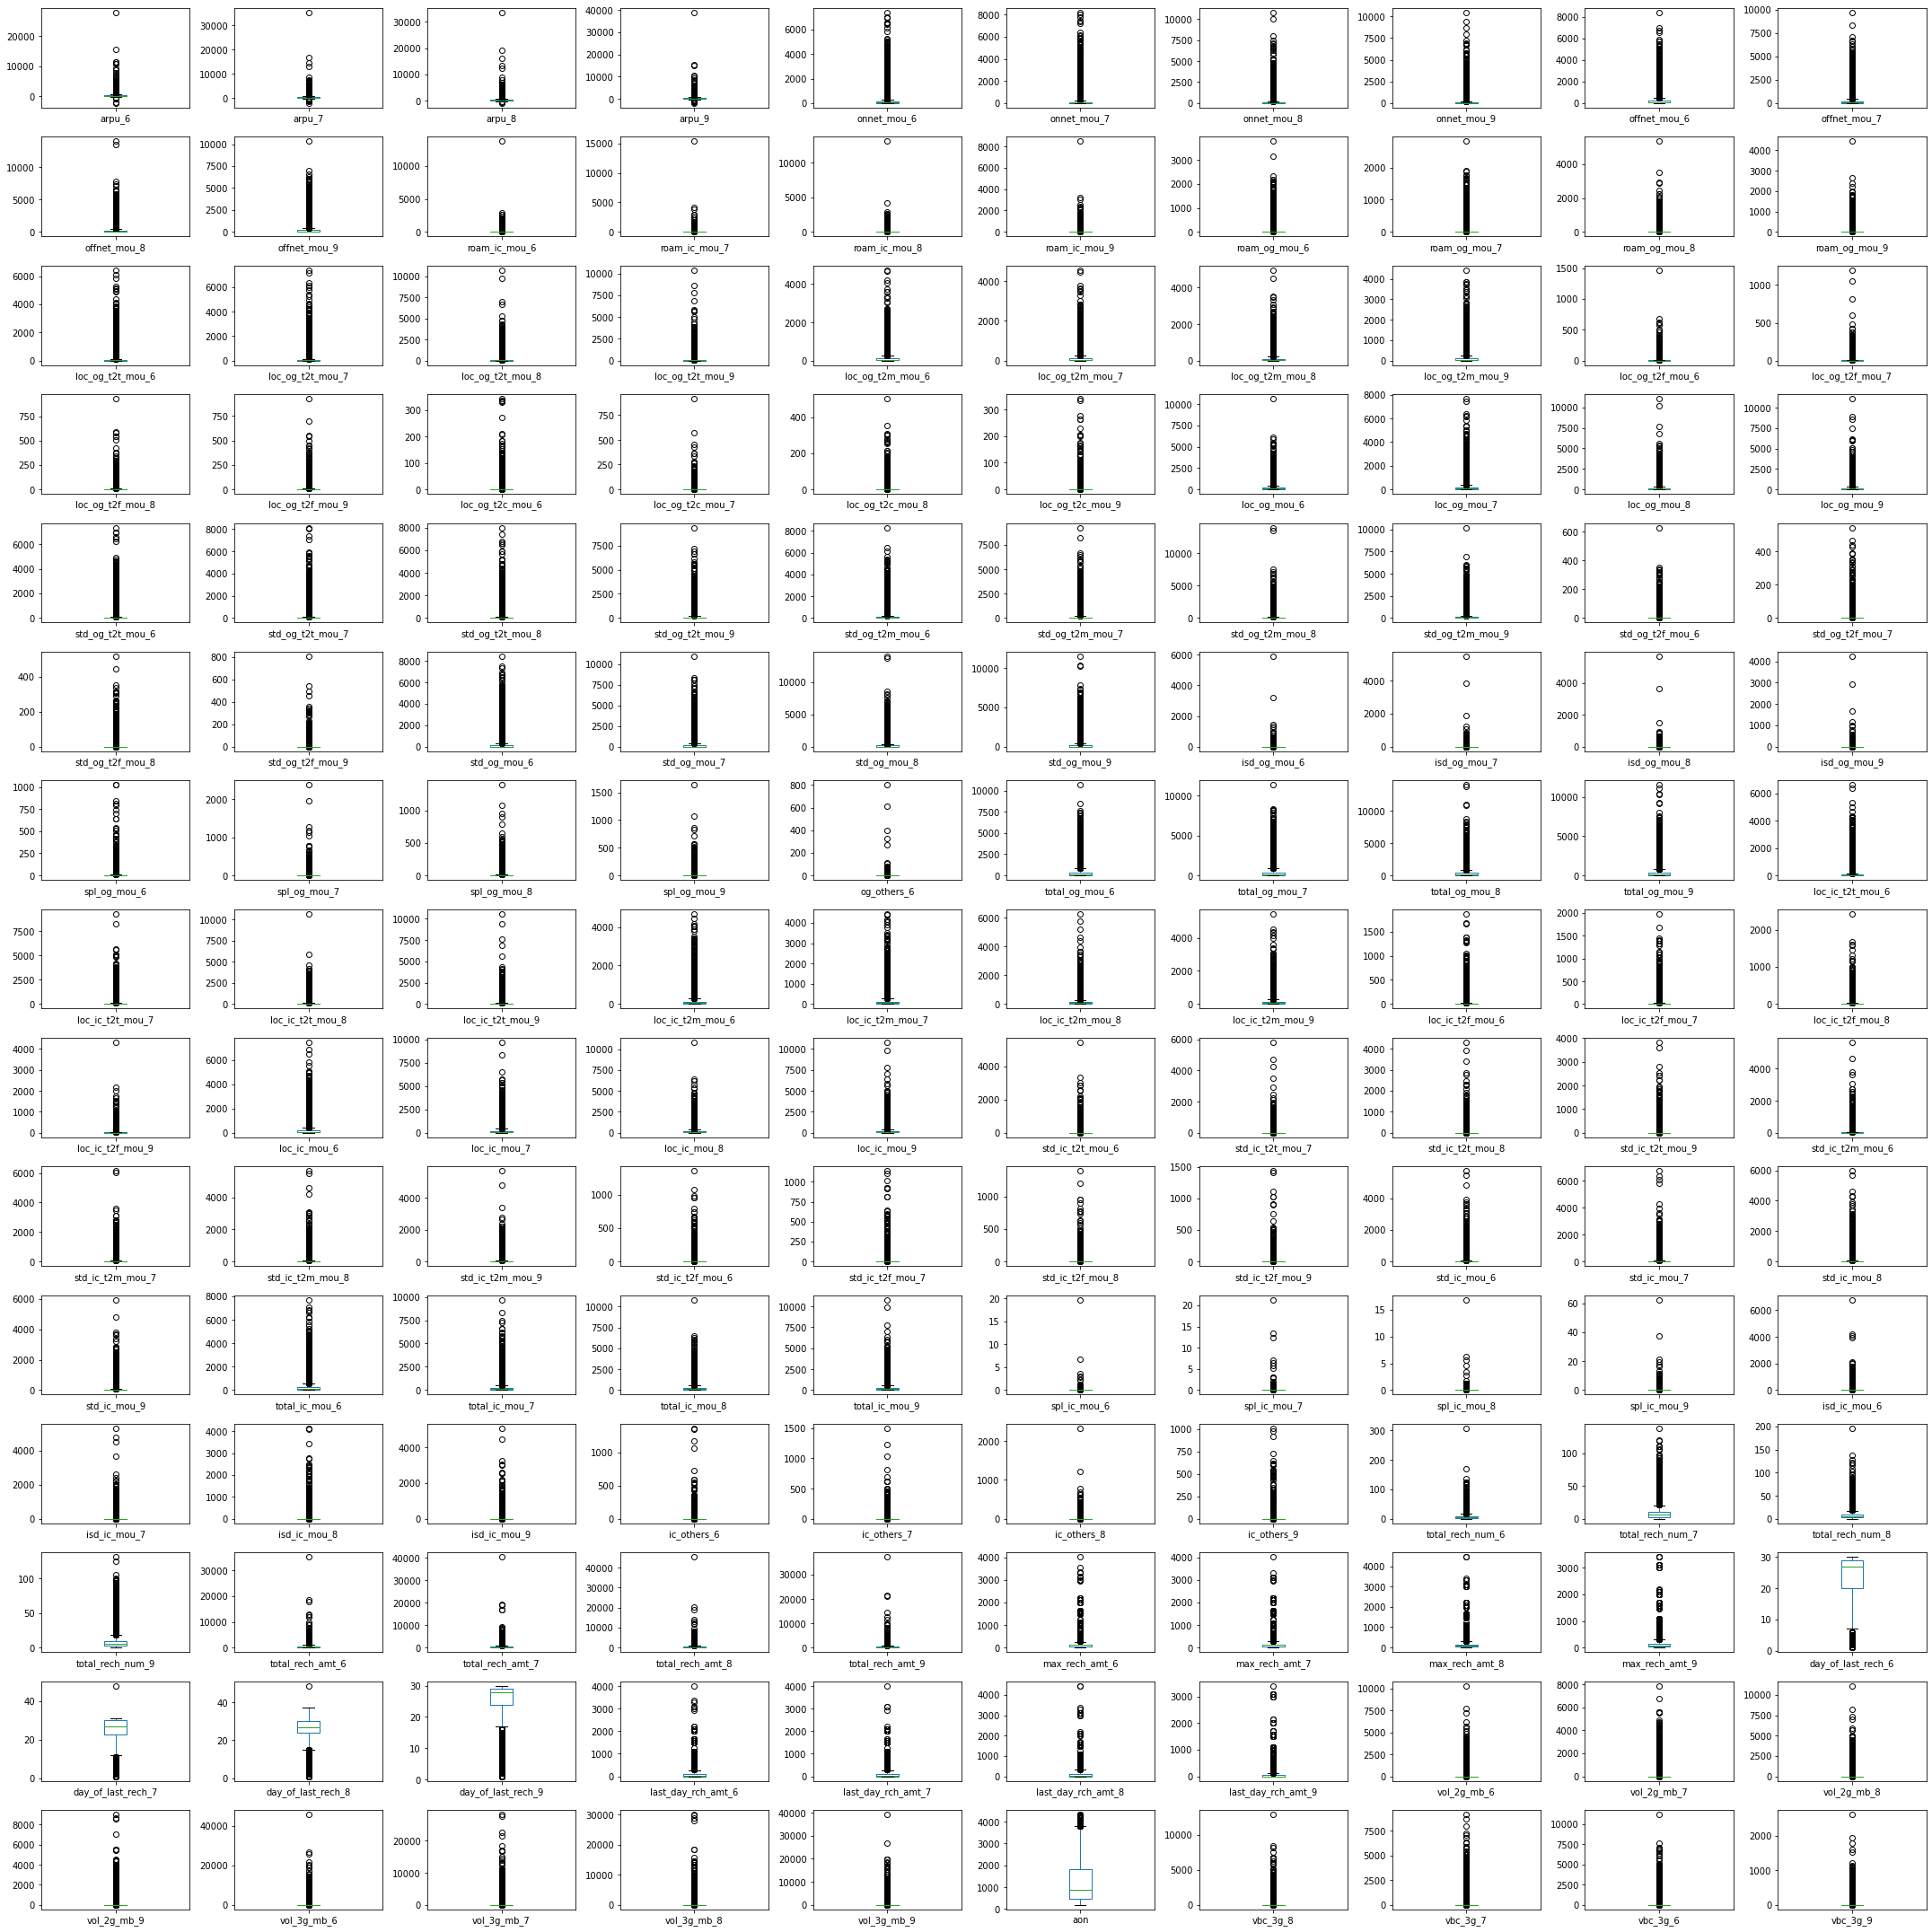

In [65]:
plt.figure(figsize=(30,30))
i=1
for feature in df_num.columns:
    plt.subplot(15,10,i)
    df_imputed_actual[feature].plot.box()
    i = i+1
    
plt.tight_layout()
plt.show()

In [66]:
df_imputed_actual.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.98,0.99])

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     282.987358    278.536648    279.154731    261.645069    127.183397   
std      328.439770    338.156291    344.474791    341.998630    292.433718   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
25%       93.411500     86.980500     84.126000     62.685000      5.430000   
50%      197.704000    191.640000    192.080000    176.849000     30.980000   
75%      371.060000    365.344500    369.370500    353.466500    112.610000   
90%      620.075400    617.252000    618.160400    601.537000    330.590000   
95%      829.488200    828.357200    833.303300    805.107200    594.285000   
98%     1137.079960   1149.565120   1171.041440   1132.490400   1033.112000   
99%     1410.792540   1428.685880   1455.539960   1402.445660   1410.511400   
max    27731.088000  35145.834000  33543.624000  38805.617000   7376.710000   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     131.207200    126.636289    121.033448    196.556965    190.558692   
std      303.029013    301.720976    298.015453    310.626951    321.151804   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.285000      7.340000      6.480000     36.720000     29.090000   
50%       35.790000     28.130000     23.930000    103.410000     85.460000   
75%      108.940000    106.760000     99.130000    222.550000    217.830000   
90%      334.496000    326.992000    315.690000    464.304000    468.790000   
95%      607.158000    594.812000    579.855000    712.595000    727.457000   
98%     1060.340000   1046.750000   1018.998000   1125.798000   1136.202400   
99%     1463.311600   1452.734200   1398.037200   1517.047400   1524.160600   
max     8157.780000  10752.560000  10427.460000   8362.360000   9667.130000   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000   99999.000000   99999.000000   
mean     190.423082    175.953573      18.097979      10.460783   
std      319.298394    310.771160      82.078463      74.161360   
min        0.000000      0.000000       0.000000       0.000000   
25%       34.480000     16.090000       0.000000       0.000000   
50%       84.659756     74.680000       0.000000       0.000000   
75%      215.510000    202.835000       0.000000       0.000000   
90%      466.540000    444.860000      28.960000      14.792000   
95%      712.352000    689.869000     195.823665      87.068986   
98%     1119.247200   1084.899600     218.303370      97.048868   
99%     1495.840400   1466.138400     234.018185     156.111400   
max    14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean       15.215480       8.503911      15.422195       9.648919   
std        74.662246      55.604819      70.421545      57.331765   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        25.530000      29.470624      49.240000       9.530000   
95%       150.170362      35.054514      65.912000      40.931000   
98%       156.503019      68.635200     169.782000     119.980400   
99%       176.291400     134.713000     281.115400     215.685000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99999.000000   99999.000000      99999.000000      99999.000000   
mean       12.125686       7.898515  

We will first identify the features which has outliers. We will do this by understanding how many times the maximum values is bigger than the 99th percentile value. We will consider all the features as outliers where the maximum value is 3times bigger than the 99th percentile value.

In [67]:
df_outlier_det = np.round(df_imputed_actual[df_num.columns].max() / df_imputed_actual[df_num.columns].quantile(0.99), 2)
df_outlier_det.sort_values()

day_of_last_rech_9      1.00
day_of_last_rech_6      1.00
aon                     1.19
day_of_last_rech_7      1.54
day_of_last_rech_8      1.57
                       ...  
ic_others_8           147.50
isd_og_mou_7          690.60
isd_og_mou_9          720.63
isd_og_mou_6          783.45
isd_og_mou_8          886.36
Length: 150, dtype: float64

In [68]:
lis_outlier_features = df_outlier_det[df_outlier_det > 3].reset_index()['index']
len(lis_outlier_features)

145

In [69]:
#performing outlier capping to 99th percentile
for feature in lis_outlier_features:
    df_imputed_actual[feature][df_imputed_actual[feature] > df_imputed_actual[feature].quantile(.99)] = df_imputed_actual[feature].quantile(.99)

In [70]:
df_imputed_actual.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.98,0.99])

arpu_6        arpu_7        arpu_8        arpu_9   onnet_mou_6  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     276.753034    272.257932    272.723072    255.268407    120.112854   
std      269.032775    271.329634    275.734361    271.574386    235.663025   
min    -2258.709000  -2014.045000   -945.808000  -1899.505000      0.000000   
25%       93.411500     86.980500     84.126000     62.685000      5.430000   
50%      197.704000    191.640000    192.080000    176.849000     30.980000   
75%      371.060000    365.344500    369.370500    353.466500    112.610000   
90%      620.075400    617.252000    618.160400    601.537000    330.590000   
95%      829.488200    828.357200    833.303300    805.107200    594.285000   
98%     1137.079960   1149.565120   1171.041440   1132.490400   1033.112000   
99%     1410.789071   1428.682078   1455.519419   1402.427373   1410.510028   
max     1410.792540   1428.685880   1455.539960   1402.445660   1410.511400   

        onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  offnet_mou_7  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean     123.875238    119.222388    113.354036    189.634480    183.061133   
std      242.608258    239.607182    232.423346    259.372208    264.504133   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.285000      7.340000      6.480000     36.720000     29.090000   
50%       35.790000     28.130000     23.930000    103.410000     85.460000   
75%      108.940000    106.760000     99.130000    222.550000    217.830000   
90%      334.496000    326.992000    315.690000    464.304000    468.790000   
95%      607.158000    594.812000    579.855000    712.595000    727.457000   
98%     1060.340000   1046.750000   1018.998000   1125.798000   1136.202400   
99%     1463.310032   1452.730084   1398.030144   1517.040148   1524.111012   
max     1463.311600   1452.734200   1398.037200   1517.047400   1524.160600   

       offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  99999.000000  99999.000000   99999.000000   99999.000000   
mean     182.964337    168.568525      15.857440       8.023960   
std      259.009522    255.166064      50.614217      26.284350   
min        0.000000      0.000000       0.000000       0.000000   
25%       34.480000     16.090000       0.000000       0.000000   
50%       84.659756     74.680000       0.000000       0.000000   
75%      215.510000    202.835000       0.000000       0.000000   
90%      466.540000    444.860000      28.960000      14.792000   
95%      712.352000    689.869000     195.823665      87.068986   
98%     1119.247200   1084.899600     218.303370      97.048868   
99%     1495.791008   1466.110568     234.016553     156.110028   
max     1495.840400   1466.138400     234.018185     156.111400   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   99999.000000   99999.000000   99999.000000   99999.000000   
mean       12.973956       6.319142      12.791474       7.286636   
std        39.891424      19.236339      40.804524      29.441280   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        25.530000      29.470624      49.240000       9.530000   
95%       150.170362      35.054514      65.912000      40.931000   
98%       156.503019      68.635200     169.782000     119.980400   
99%       176.290028     134.710060     281.110108     215.680100   
max       176.291400     134.713000     281.115400     215.685000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   99999.000000   99999.000000      99999.000000      99999.000000   
mean        9.601102       5.486559  

In [71]:
df_outlier_det_2 = np.round(df_imputed_actual[df_num.columns].max() / df_imputed_actual[df_num.columns].quantile(0.99), 2)
df_outlier_det_2.sort_values()

arpu_6                1.00
std_ic_t2f_mou_7      1.00
std_ic_t2f_mou_8      1.00
std_ic_t2f_mou_9      1.00
std_ic_mou_6          1.00
                      ... 
std_og_mou_6          1.00
std_og_t2m_mou_8      1.00
aon                   1.19
day_of_last_rech_7    1.54
day_of_last_rech_8    1.57
Length: 150, dtype: float64

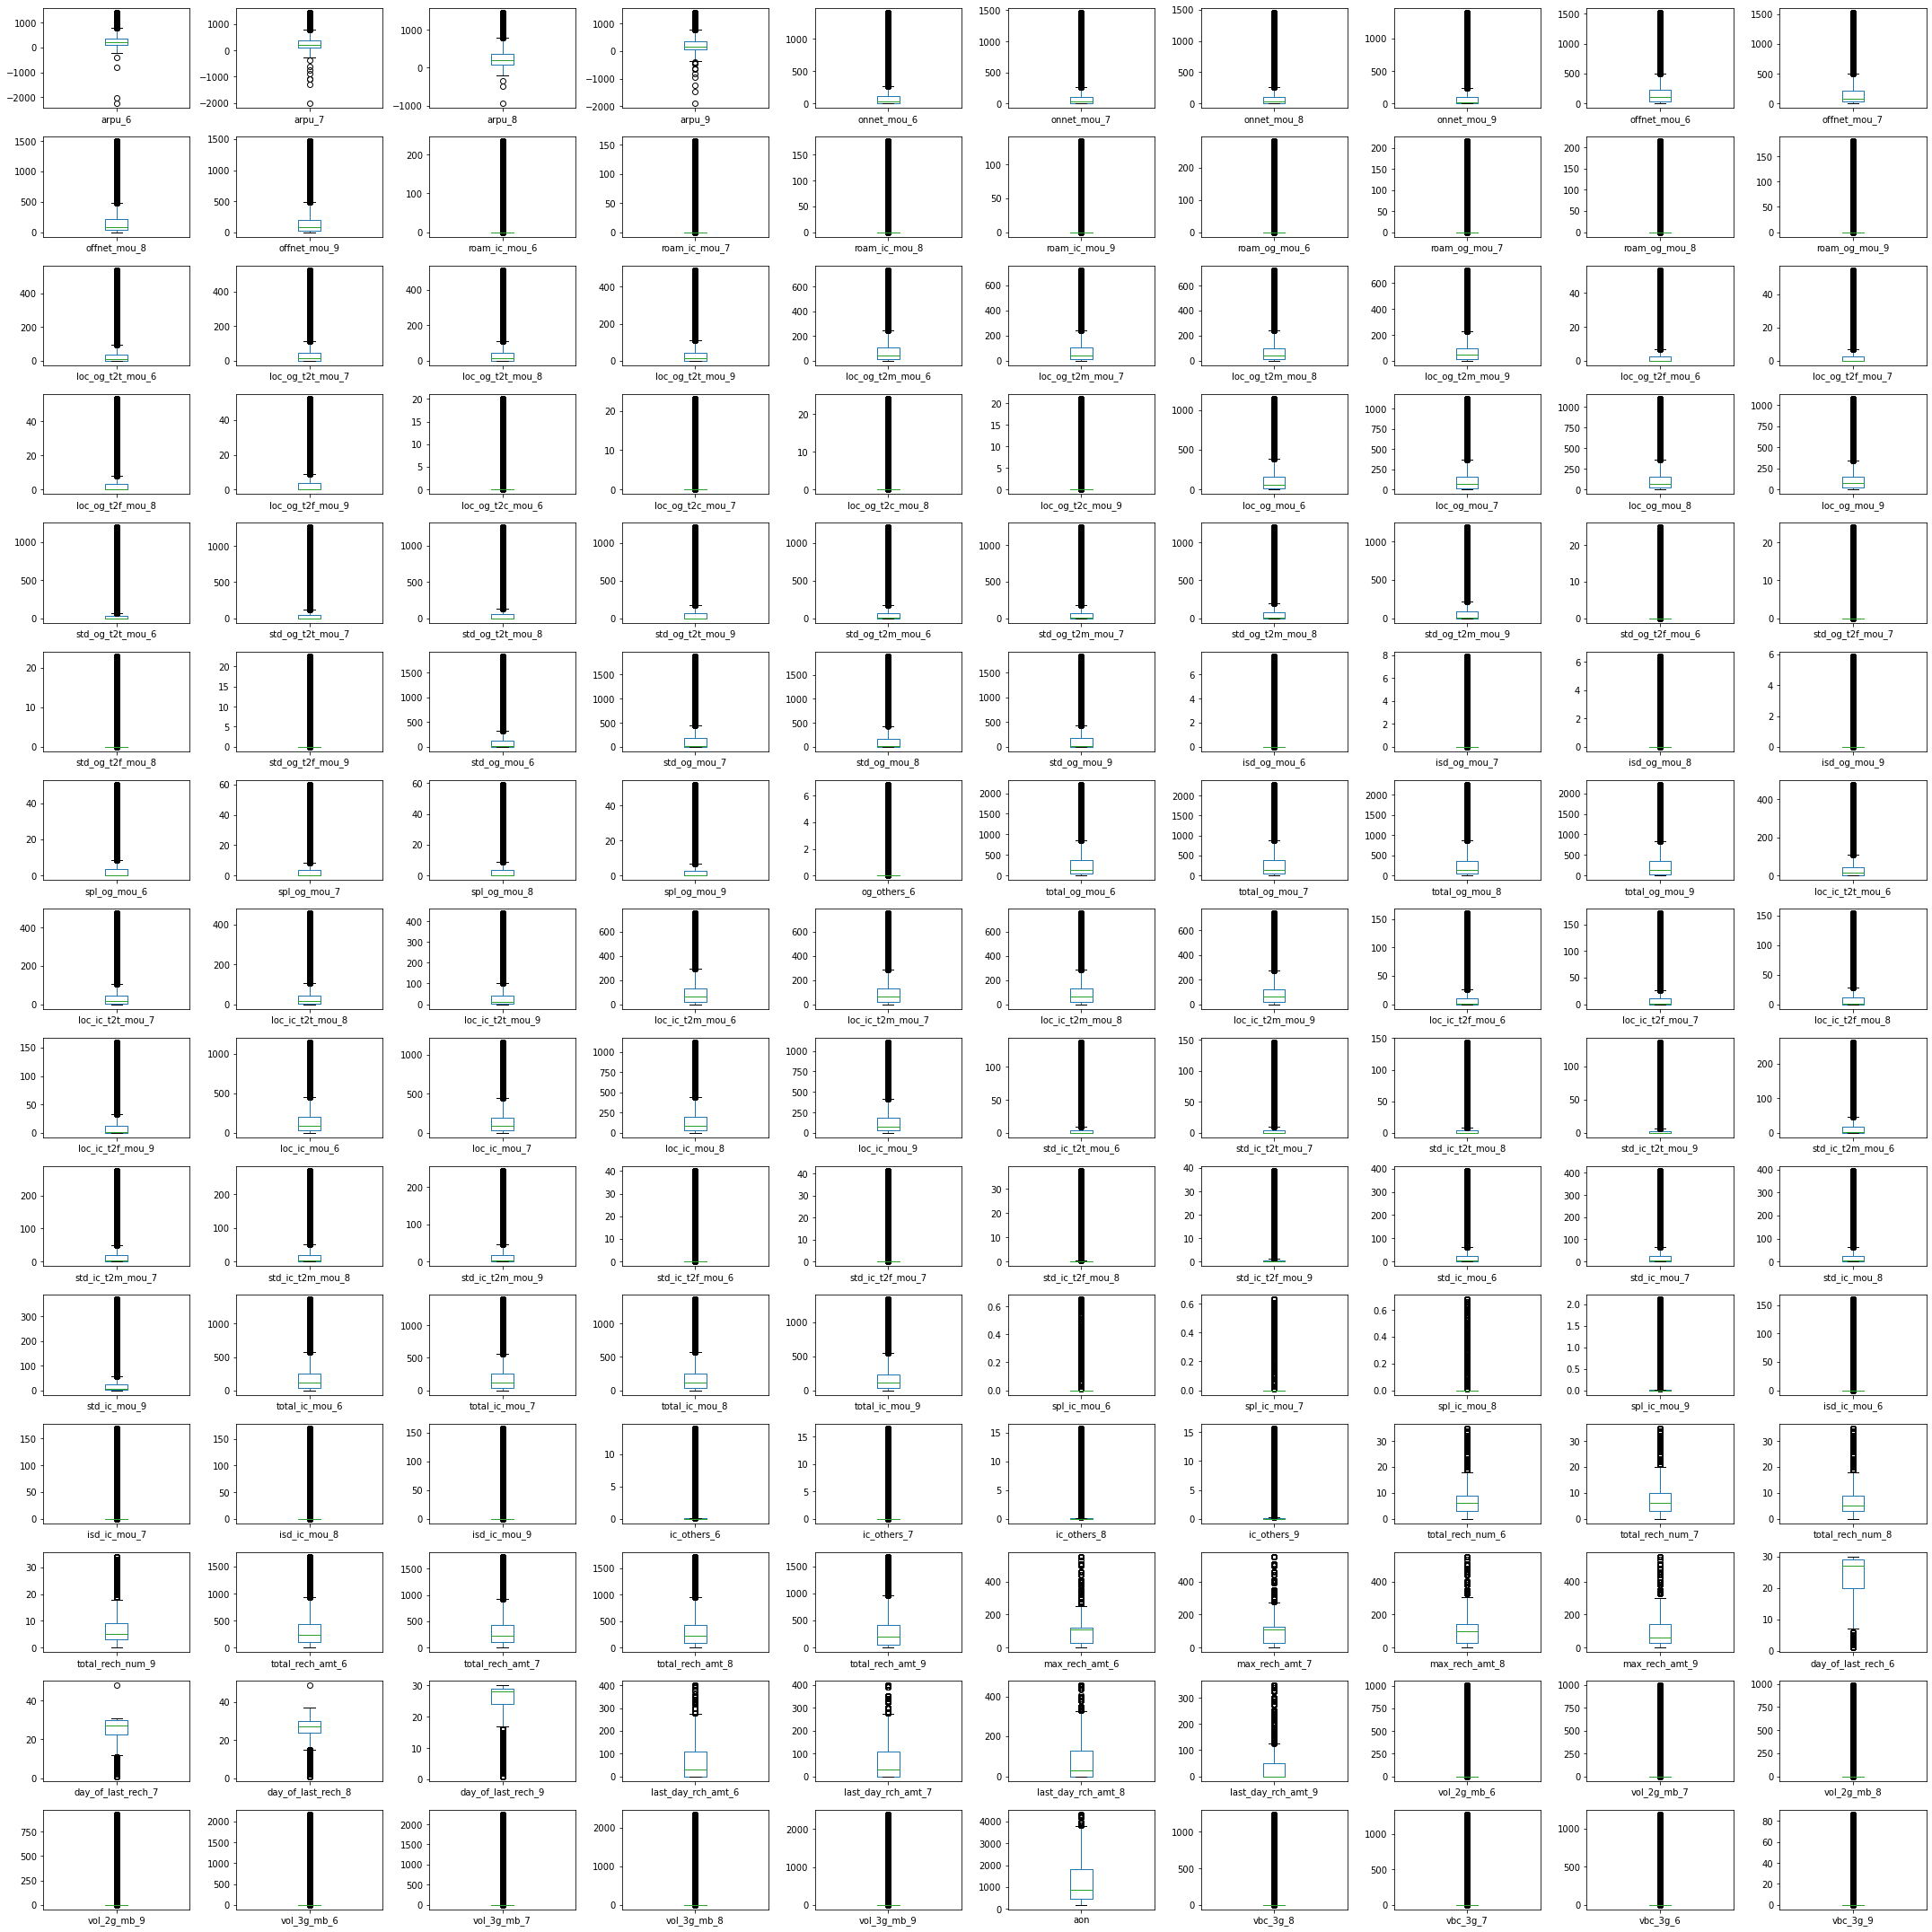

In [72]:
plt.figure(figsize=(30,30))
i=1
for feature in df_num.columns:
    plt.subplot(15,10,i)
    df_imputed_actual[feature].plot.box()
    i = i+1
    
plt.tight_layout()
plt.show()

In [73]:
#df_imputed_actual.to_csv('gdrive/My Drive/Colab Notebooks/Post_Outlier_Treatment.csv')

# <font color=blue>3. Filtering High Valued Customers</font>

By the requirement, we will filter the high value customers who are above 70th percentile of average recharge amount in the 6th & 7th month.

In [74]:
df_imputed_actual['avg_rech_amt'] = (df_imputed_actual['total_rech_amt_6'] +	df_imputed_actual['total_rech_amt_7']) / 2

In [75]:
df_imputed_actual[['total_rech_amt_6', 'total_rech_amt_7', 'avg_rech_amt']].describe()

total_rech_amt_6  total_rech_amt_7  avg_rech_amt
count      99999.000000      99999.000000  99999.000000
mean         319.780838        315.411084    317.595961
std          322.968988        328.214359    296.180110
min            0.000000          0.000000      0.000000
25%          109.000000        100.000000    115.000000
50%          230.000000        220.000000    229.000000
75%          437.500000        428.000000    419.000000
max         1683.020000       1728.000000   1705.510000

In [76]:
df_hvc = df_imputed_actual[df_imputed_actual['avg_rech_amt'] >= df_imputed_actual['avg_rech_amt'].quantile(0.70)].copy()
df_hvc.shape

(30011, 191)

In [77]:
df_hvc.head()

arpu_6    arpu_7      arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.850  1455.53996  500.000        57.84        54.68   
8    378.721   492.223   137.36200  166.787       413.69       351.03   
13   492.846   205.671   593.26000  322.732       501.76       108.39   
16   430.975   299.869   187.89400  206.490        50.51        74.01   
17   690.008    18.980    25.49900  257.583      1185.91         9.28   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29     0.023093        453.43        567.16        325.91   
8         35.08    33.460000         94.66         80.63        136.48   
13       534.24   244.810000        413.31        119.28        482.46   
16        70.61    31.340000        296.29        229.74        162.76   
17         7.79   558.510000         61.64          0.00          5.54   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7       1.834812          16.23          33.49          31.64      41.088369   
8     108.710000           0.00           0.00           0.00       0.000000   
13    214.060000          23.53         144.24          72.11     134.713000   
16    224.390000           0.00           2.83           0.00       0.000000   
17     87.890000           0.00           4.76           4.81       0.000000   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7           23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00   
13           7.98          35.26           1.44          12.78   
16           0.00          17.74           0.00           0.00   
17           0.00           8.46          13.34          17.98   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28         45.127994   
8             297.13            217.59             12.49         26.130000   
13             49.63              6.19             36.01          6.140000   
16             42.61             65.16             67.38         26.880000   
17             38.99              0.00              0.00         36.410000   

    loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
7             308.63            447.38            162.28         92.339108   
8              80.96             70.58             50.54         34.580000   
13            151.13             47.28            294.46        108.240000   
16            273.29            145.99            128.28        201.490000   
17             58.54              0.00              0.00          9.380000   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
7             53.631            54.591             53.23          3.894955   
8              0.000             0.000              0.00          0.000000   
13             4.540             0.000             23.51          5.290000   
16             0.000             4.480             10.26          4.660000   
17             0.000             0.000              0.00          0.000000   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00               0.0   
8                0.0               0.0              7.15               0.0   
13               0.0               0.0              0.49               0.0   
16               0.0               0.0              0.00               0.0   
17               0.0               0.0              0.00               0.0   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
7         422.16        533.91        255.79    141.368914              4.30   
8         378.09        288.18         63.04     60.710000            116.56   
13        205.31         53.48        353.99    119.690000            446.41   
16        315.91        215.64        205.93    

In [78]:
np.round(df_hvc.isnull().mean()[df_hvc.isnull().mean() != 0].sort_values(ascending=False) * 100, 2)

Series([], dtype: float64)

# <font color=blue>4. Identifying Derived Variables</font>

The average recharge a customer did in a month is a very insightful derived variable.

In [79]:
#Derived Variables - 'avg_rech_amt_6','avg_rech_amt_7','avg_rech_amt_8','avg_rech_amt_9'
df_hvc['avg_rech_amt_6'] = df_hvc['total_rech_amt_6'] / df_hvc['total_rech_num_6']
df_hvc['avg_rech_amt_7'] = df_hvc['total_rech_amt_7'] / df_hvc['total_rech_num_7']
df_hvc['avg_rech_amt_8'] = df_hvc['total_rech_amt_8'] / df_hvc['total_rech_num_8']
df_hvc['avg_rech_amt_9'] = df_hvc['total_rech_amt_9'] / df_hvc['total_rech_num_9']

In [80]:
df_hvc['avg_rech_amt_6'][df_hvc['avg_rech_amt_6'].isnull()] = 0
df_hvc['avg_rech_amt_7'][df_hvc['avg_rech_amt_7'].isnull()] = 0
df_hvc['avg_rech_amt_8'][df_hvc['avg_rech_amt_8'].isnull()] = 0
df_hvc['avg_rech_amt_9'][df_hvc['avg_rech_amt_9'].isnull()] = 0

In [81]:
df_hvc[['avg_rech_amt_6', 'avg_rech_amt_7', 'avg_rech_amt_8', 'avg_rech_amt_9']].describe()

avg_rech_amt_6  avg_rech_amt_7  avg_rech_amt_8  avg_rech_amt_9
count    30011.000000    30011.000000    30011.000000    30011.000000
mean        74.498785       78.445651       80.162827       73.443514
std         65.434830       70.967656       82.963495       82.390883
min          0.000000        0.000000        0.000000        0.000000
25%         39.921538       38.603571       31.500000       27.000000
50%         63.000000       65.250000       61.111111       55.500000
75%         89.000000       95.000000      104.000000       97.500000
max       1683.020000     1728.000000     1721.000000     1678.000000

Whether the customer usage is mostly incoming calls or outgoing calls is also a very good derived variable.

In [82]:
#Derived variables - 'more_og_usage_6','more_og_usage_7','more_og_usage_8','more_og_usage_9'
df_hvc['more_og_usage_6'] = df_hvc['total_og_mou_6'] > df_hvc['total_ic_mou_6']
df_hvc['more_og_usage_6'] = df_hvc['more_og_usage_6'].map({True: 1, False: 0})

df_hvc['more_og_usage_7'] = df_hvc['total_og_mou_7'] > df_hvc['total_ic_mou_7']
df_hvc['more_og_usage_7'] = df_hvc['more_og_usage_7'].map({True: 1, False: 0})

df_hvc['more_og_usage_8'] = df_hvc['total_og_mou_8'] > df_hvc['total_ic_mou_8']
df_hvc['more_og_usage_8'] = df_hvc['more_og_usage_8'].map({True: 1, False: 0})

df_hvc['more_og_usage_9'] = df_hvc['total_og_mou_9'] > df_hvc['total_ic_mou_9']
df_hvc['more_og_usage_9'] = df_hvc['more_og_usage_9'].map({True: 1, False: 0})

df_hvc[['more_og_usage_6', 'more_og_usage_7', 'more_og_usage_8', 'more_og_usage_9']].describe()

more_og_usage_6  more_og_usage_7  more_og_usage_8  more_og_usage_9
count     30011.000000     30011.000000     30011.000000     30011.000000
mean          0.741228         0.736397         0.677452         0.639099
std           0.437967         0.440594         0.467459         0.480270
min           0.000000         0.000000         0.000000         0.000000
25%           0.000000         0.000000         0.000000         0.000000
50%           1.000000         1.000000         1.000000         1.000000
75%           1.000000         1.000000         1.000000         1.000000
max           1.000000         1.000000         1.000000         1.000000

# <font color=blue>5. Identifying Churn</font>

By the explanation, we will compute the outgoing, incoming minutes of usage and 2G, 3G data usage of 9th month. The cutsomer who has Zero will be marked as Churn.

In [83]:
df_hvc['total_consumption_9'] = df_hvc['total_og_mou_9'] + df_hvc['total_ic_mou_9'] + df_hvc['vol_2g_mb_9'] + df_hvc['vol_3g_mb_9']

In [84]:
#assigning 1 to Churn Customers and 0 to Non Churn Customers
df_hvc['churn'] = df_hvc['total_consumption_9'].apply(lambda x: 0 if x>0 else 1)

In [85]:
df_hvc.head(10)

arpu_6      arpu_7      arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
7   1069.180  1349.85000  1455.53996  500.000        57.84        54.68   
8    378.721   492.22300   137.36200  166.787       413.69       351.03   
13   492.846   205.67100   593.26000  322.732       501.76       108.39   
16   430.975   299.86900   187.89400  206.490        50.51        74.01   
17   690.008    18.98000    25.49900  257.583      1185.91         9.28   
21   514.453   597.75300   637.76000  578.596       102.41       132.11   
24   422.050   359.73000   354.79300  473.030       124.19        55.19   
33   977.020  1428.68588   409.23000  799.356         0.00         0.00   
38   363.987   486.55800   393.90900  391.709       248.99       619.96   
41   482.832   425.76400   229.76900  143.596        86.39       118.88   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
7         52.29     0.023093        453.43        567.16        325.91   
8         35.08    33.460000         94.66         80.63        136.48   
13       534.24   244.810000        413.31        119.28        482.46   
16        70.61    31.340000        296.29        229.74        162.76   
17         7.79   558.510000         61.64          0.00          5.54   
21        85.14   161.630000        757.93        896.68        983.39   
24       141.11   138.040000        450.33        370.48        283.36   
33         0.00     0.000000          0.00          0.00          0.00   
38       666.38   494.790000         88.86         50.58         97.81   
41        80.44    40.060000        232.36        280.78        136.69   

    offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  \
7       1.834812          16.23          33.49          31.64      41.088369   
8     108.710000           0.00           0.00           0.00       0.000000   
13    214.060000          23.53         144.24          72.11     134.713000   
16    224.390000           0.00           2.83           0.00       0.000000   
17     87.890000           0.00           4.76           4.81       0.000000   
21    869.890000           0.00           0.00           0.00       0.000000   
24    481.860000           9.30           0.00          13.83       0.000000   
33      0.000000           0.00           0.00           0.00       0.000000   
38    213.240000           0.00           0.00           0.00       0.000000   
41     49.060000           0.00           0.00           0.00       0.000000   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7           23.74          12.59          38.06           0.00   
8            0.00           0.00           0.00           0.00   
13           7.98          35.26           1.44          12.78   
16           0.00          17.74           0.00           0.00   
17           0.00           8.46          13.34          17.98   
21           0.00           0.00           0.00           0.00   
24           9.89           0.00          22.93           0.00   
33           0.00           0.00           0.00           0.00   
38           0.00           0.00           0.00           0.00   
41           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
7              51.39             31.38             40.28         45.127994   
8             297.13            217.59             12.49         26.130000   
13             49.63              6.19             36.01          6.140000   
16             42.61             65.16             67.38         26.880000   
17             38.99              0.00              0.00         36.410000   
21              4.48              6.16             23.34         29.980000   
24             43.69             20.14              2.48         31.580000   
33              0.00              0.00              0.00          0.000000   
38             29.88             17.33              9.4

In [86]:
df_hvc['churn'].describe()

count    30011.000000
mean         0.086402
std          0.280961
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [87]:
df_hvc['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

### 5.1 Churn Rate

In [88]:
np.round(df_hvc.churn.value_counts(normalize=True)*100, 2)

0    91.36
1     8.64
Name: churn, dtype: float64

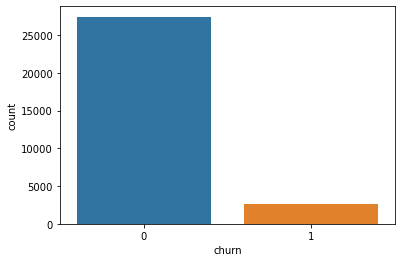

In [89]:
sns.countplot(x='churn', data=df_hvc)
plt.show()

We will get rid of all the data of 9th month as we suppose to model only on the 6-8 months data.


In [90]:
print(df_hvc.shape)
#dropping all columns which are related to 9th month(Churned phase)
df_hvc.drop(df_hvc.filter(regex='_9$', axis=1).columns, axis=1, inplace=True)
print(df_hvc.shape)

(30011, 201)
(30011, 161)


In [91]:
print(df_hvc.shape)
df_hvc.drop(df_hvc.filter(regex='.*_9_.*', axis=1).columns, axis=1, inplace=True)
print(df_hvc.shape)

(30011, 161)
(30011, 151)


# <font color=blue>6. Bivariate Analysis</font>

<Figure size 576x576 with 0 Axes>

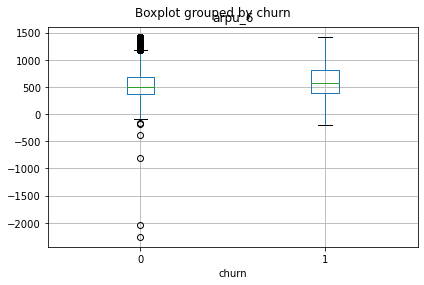

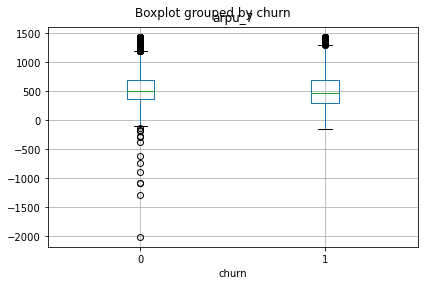

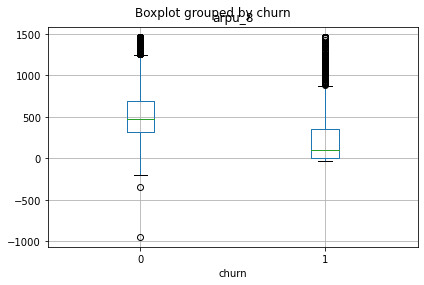

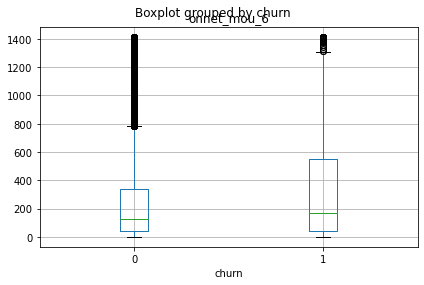

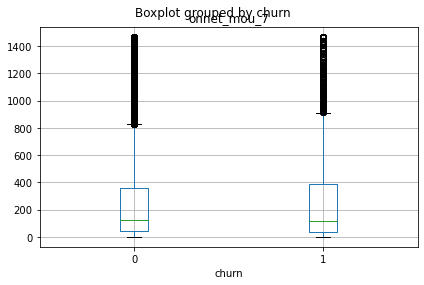

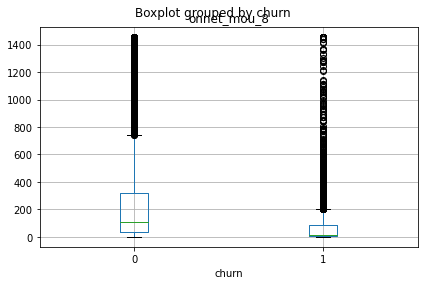

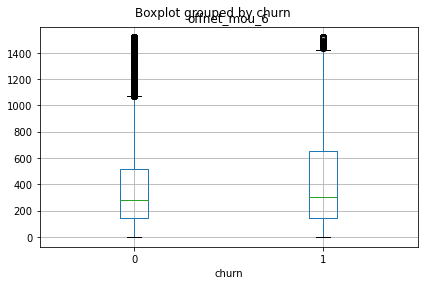

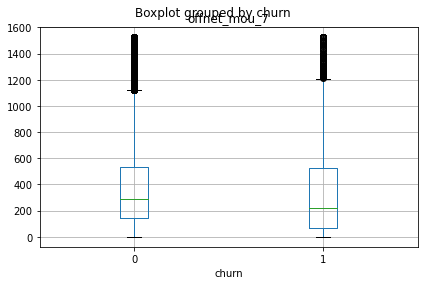

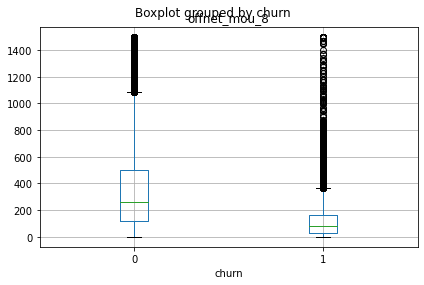

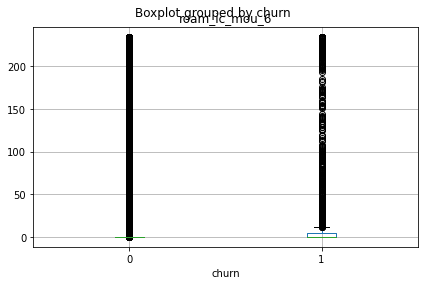

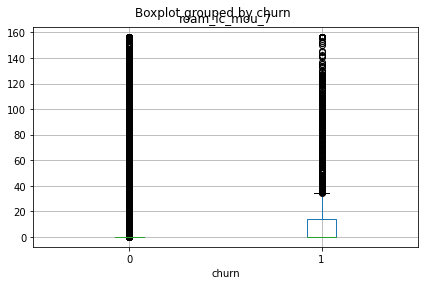

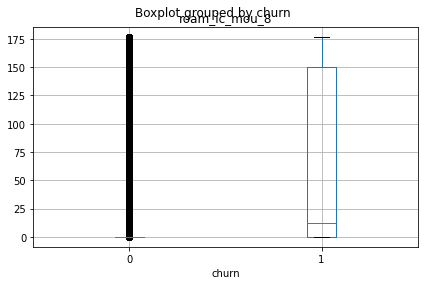

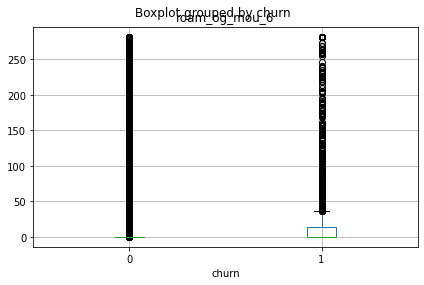

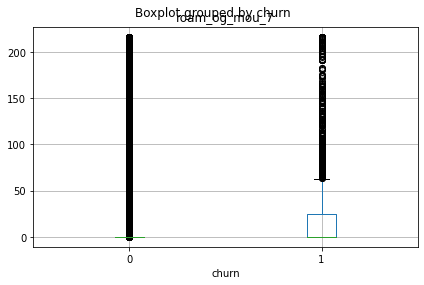

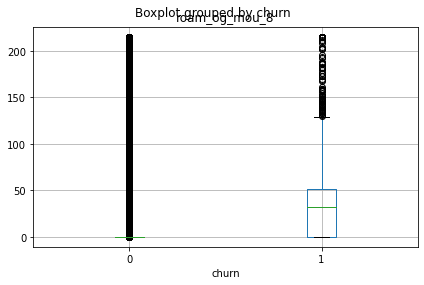

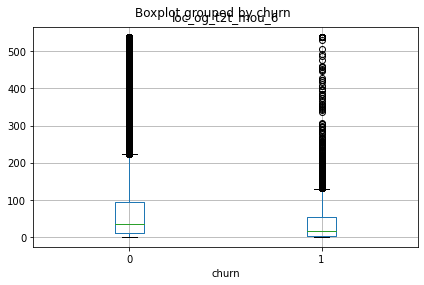

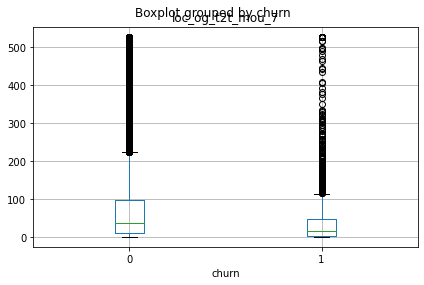

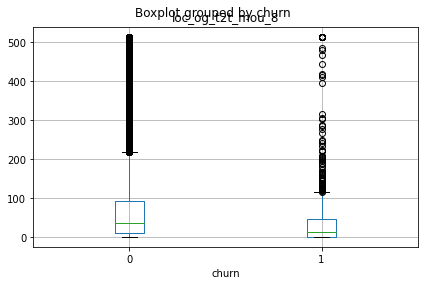

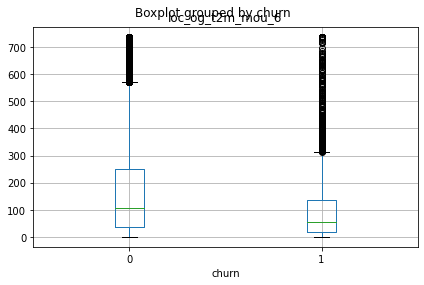

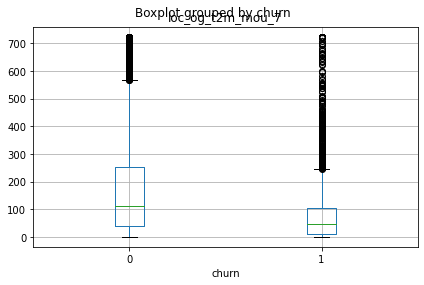

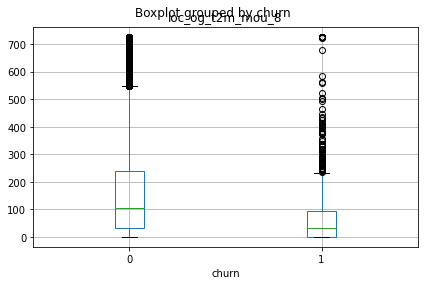

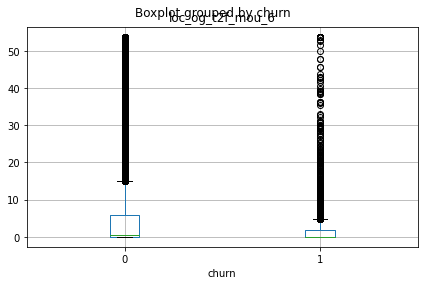

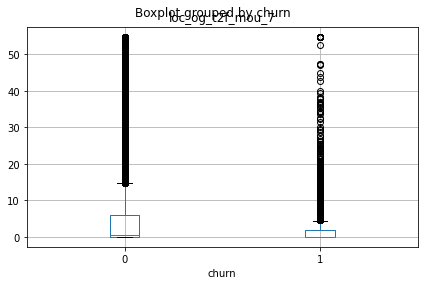

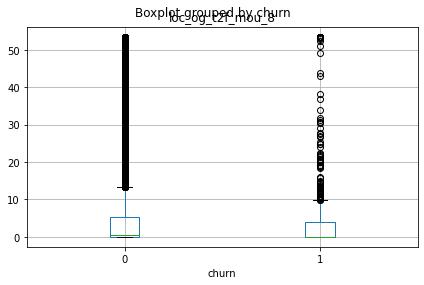

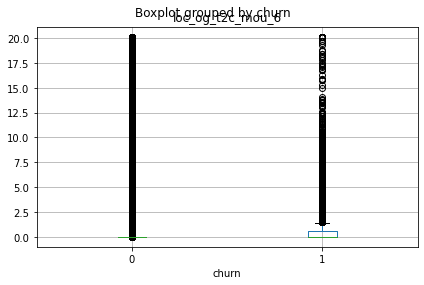

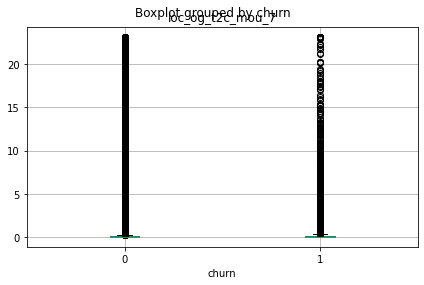

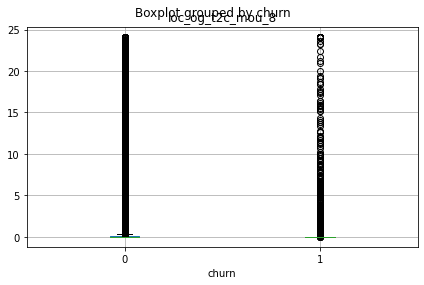

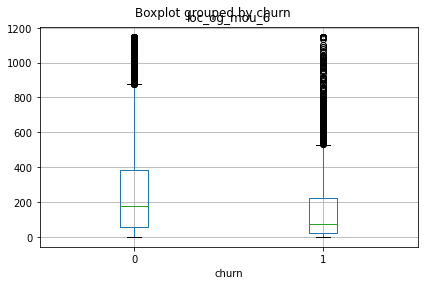

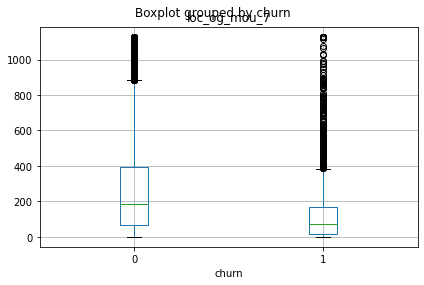

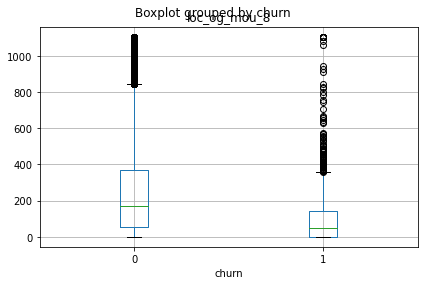

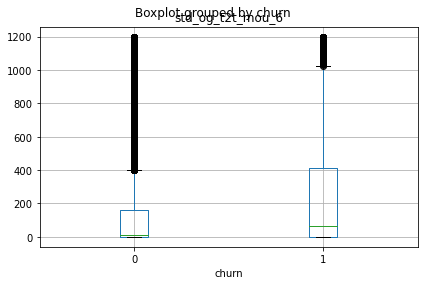

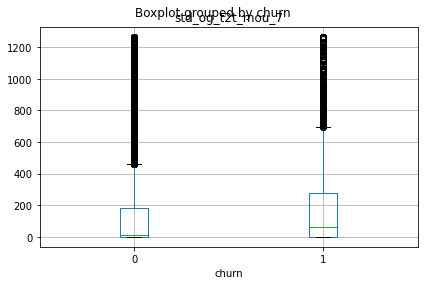

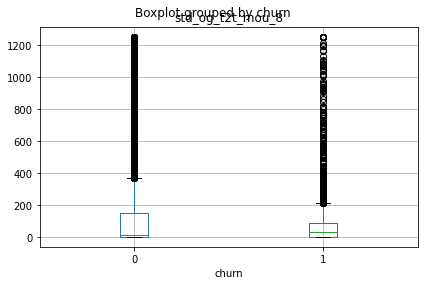

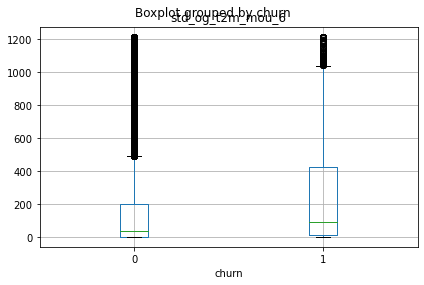

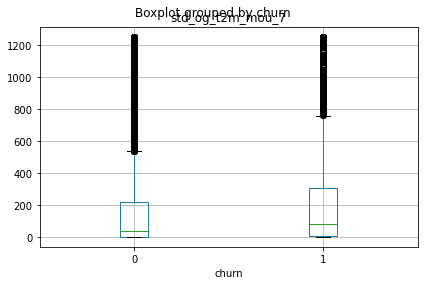

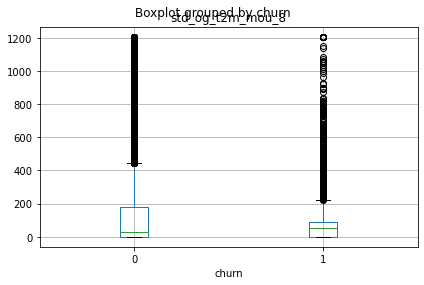

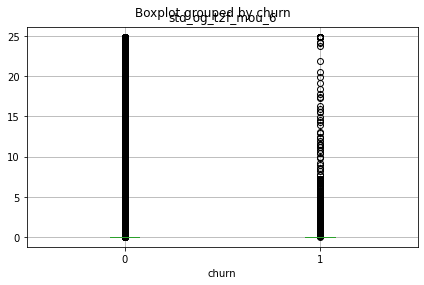

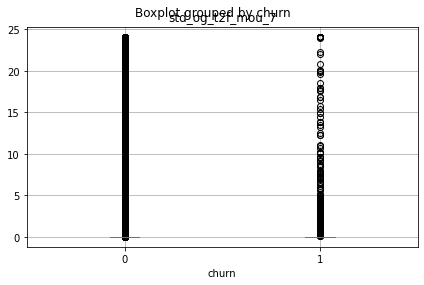

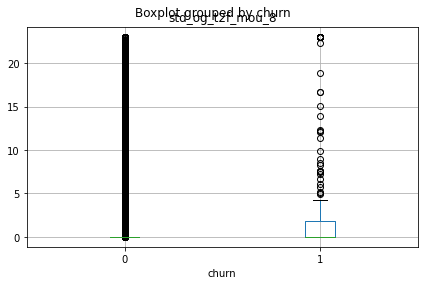

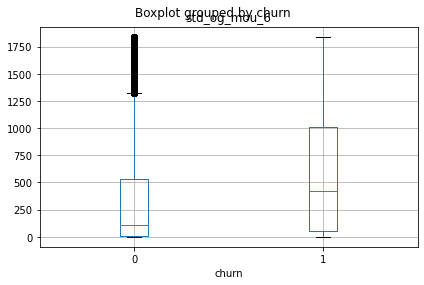

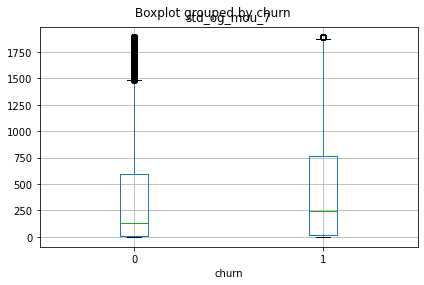

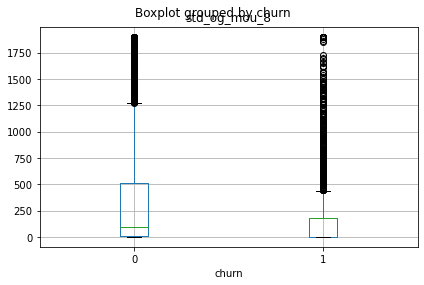

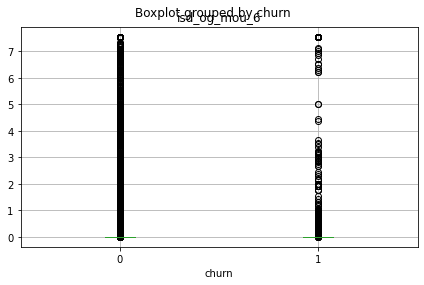

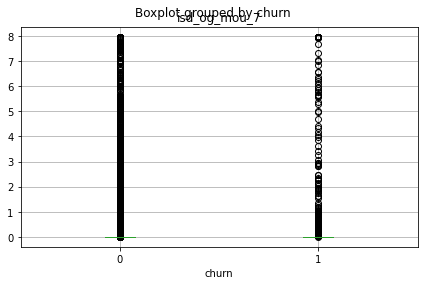

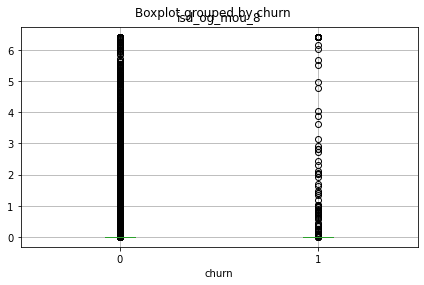

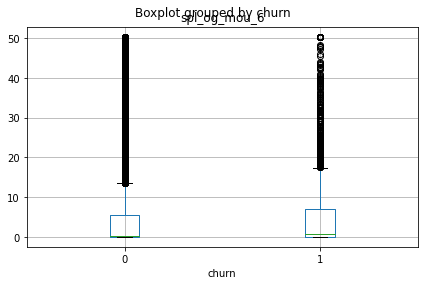

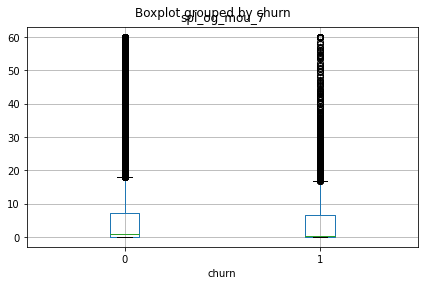

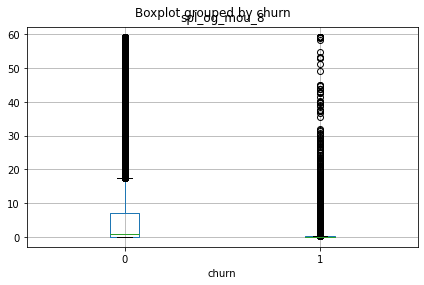

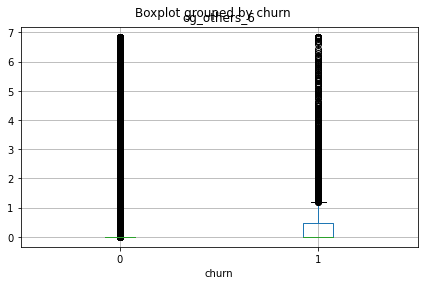

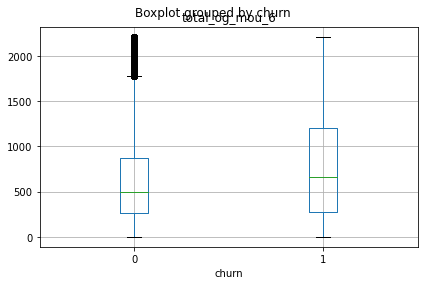

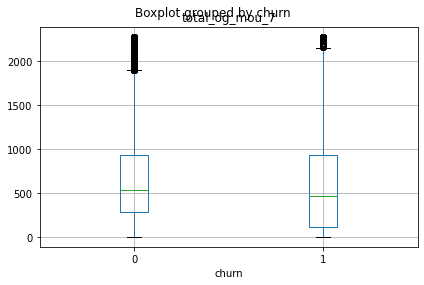

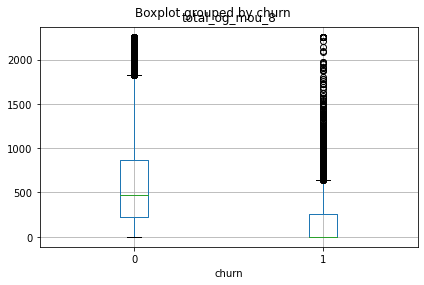

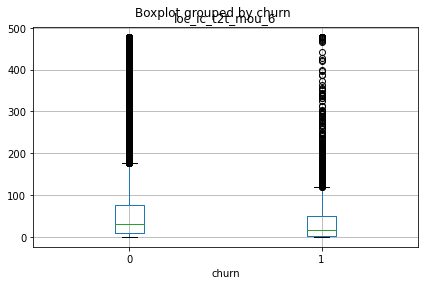

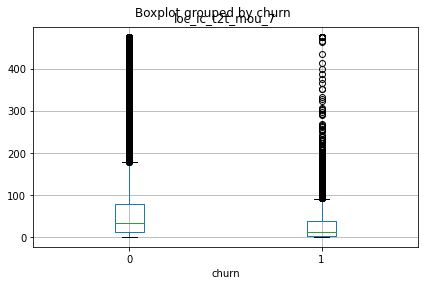

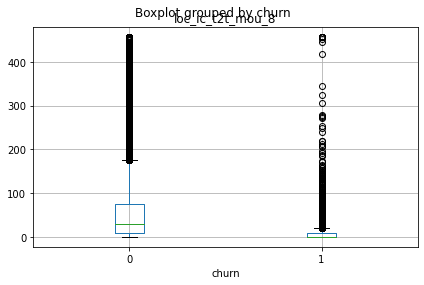

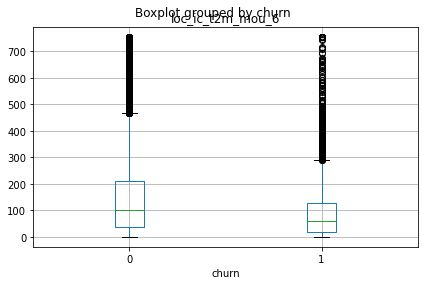

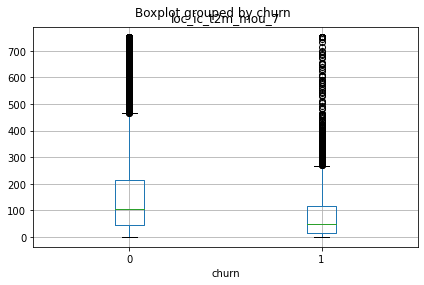

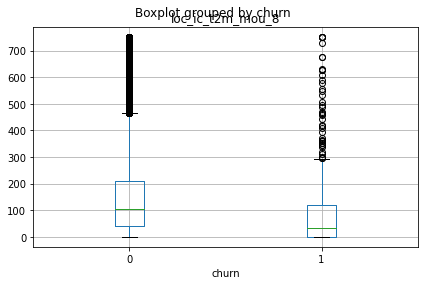

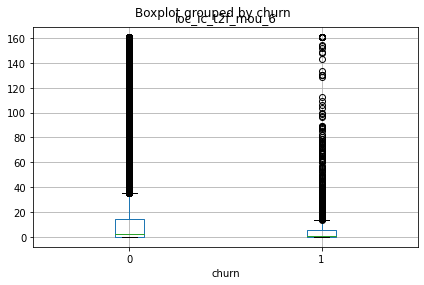

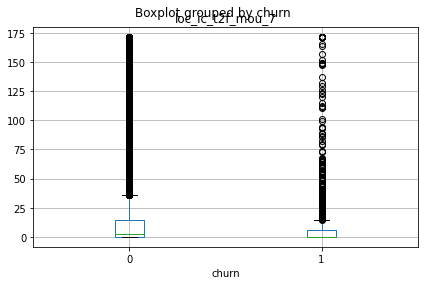

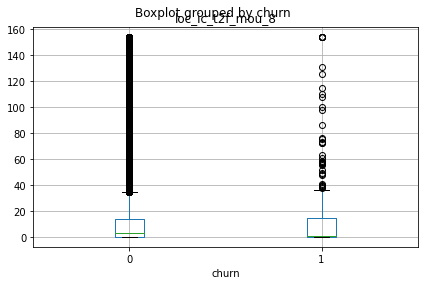

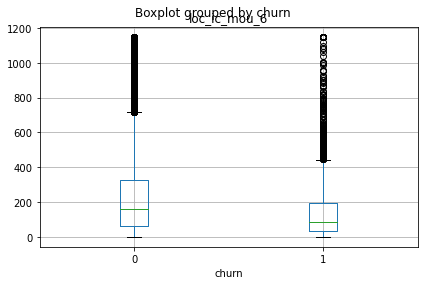

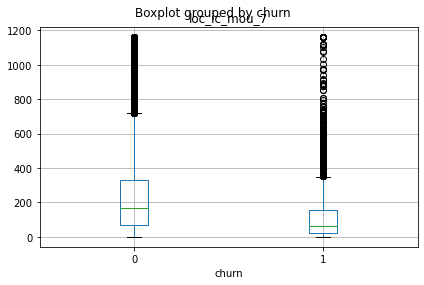

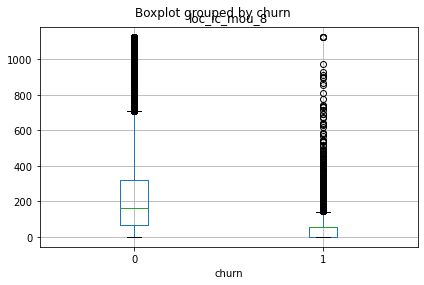

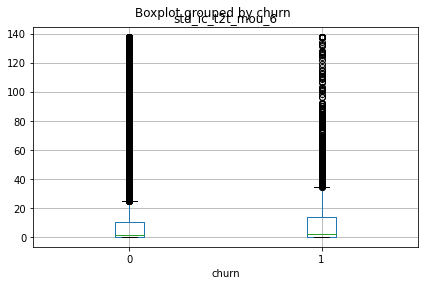

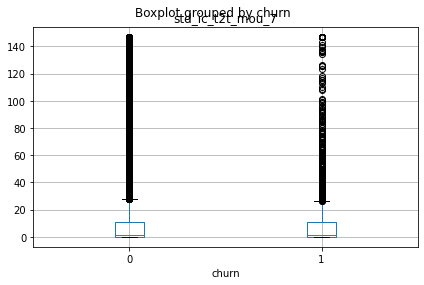

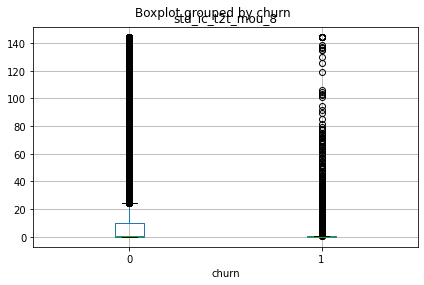

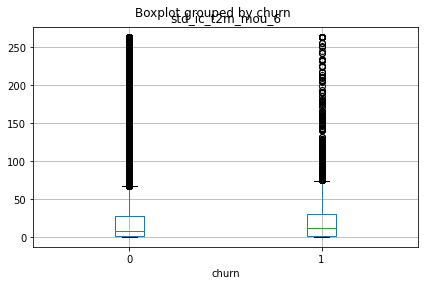

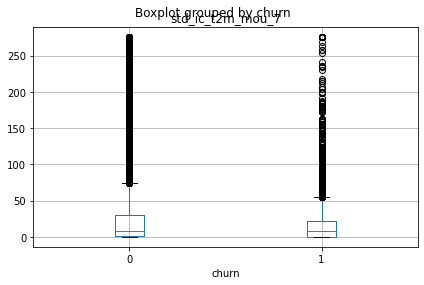

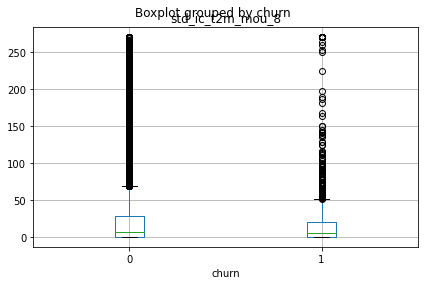

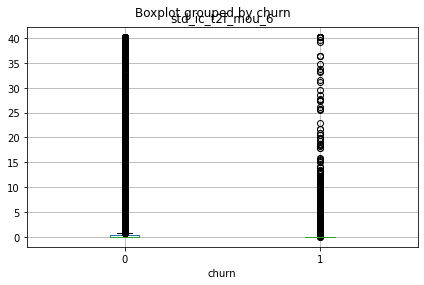

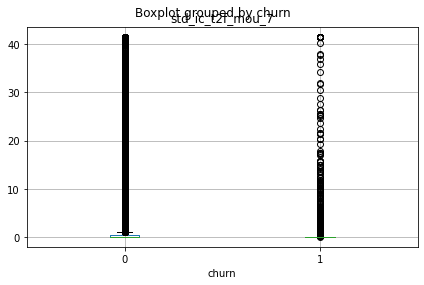

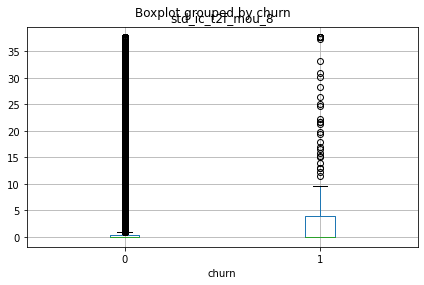

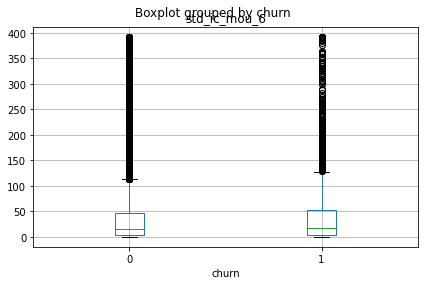

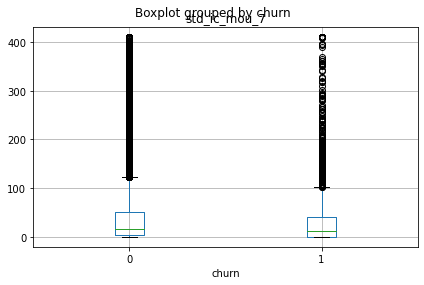

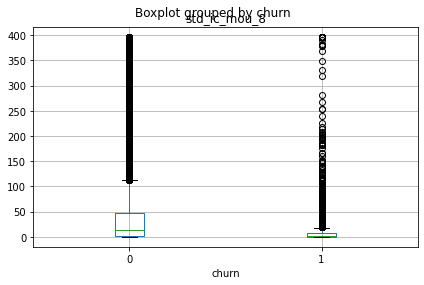

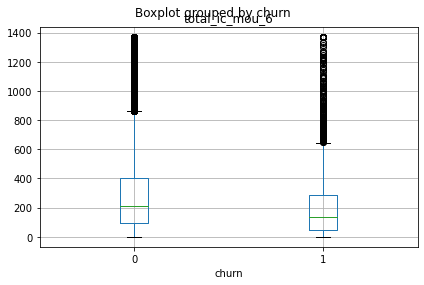

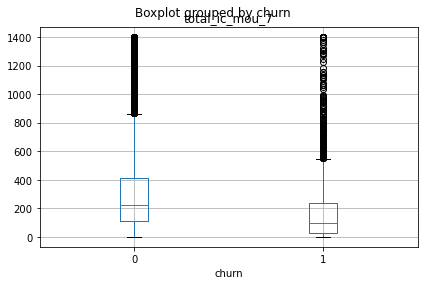

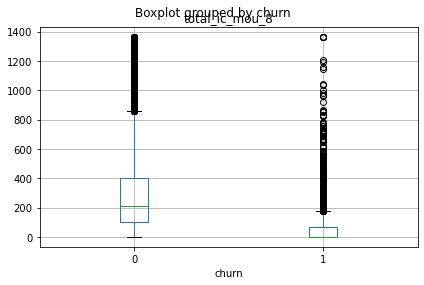

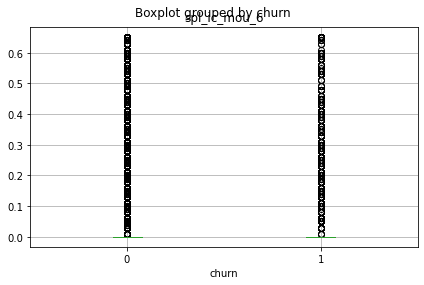

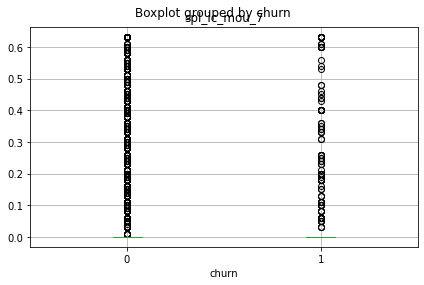

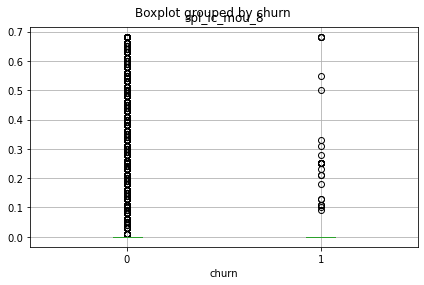

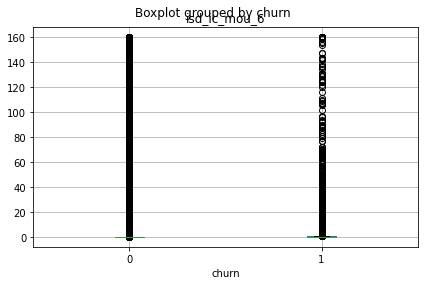

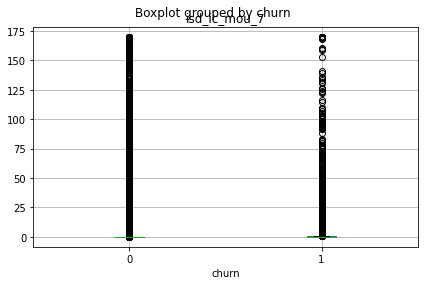

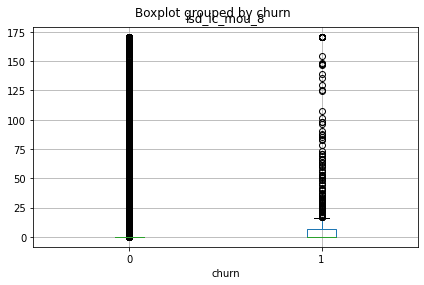

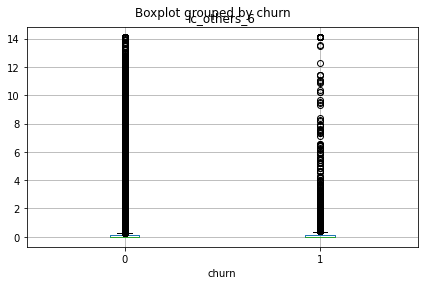

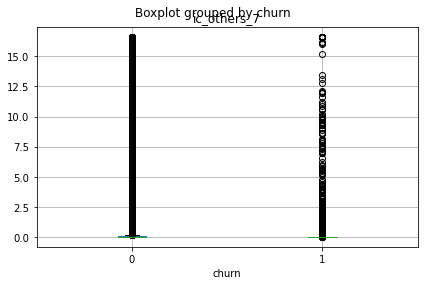

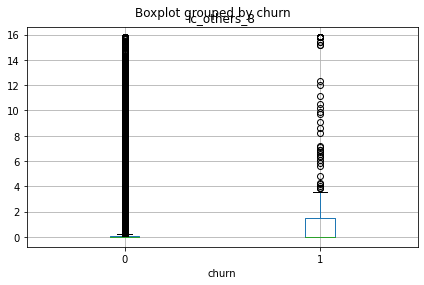

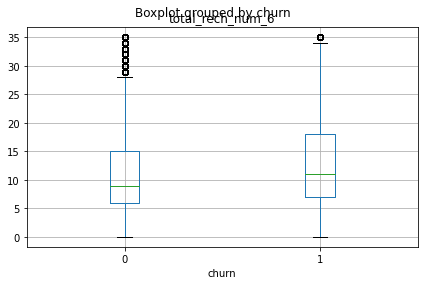

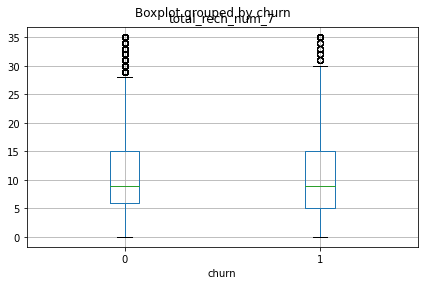

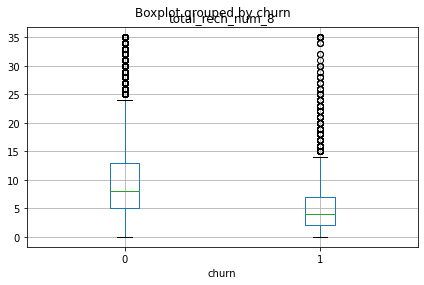

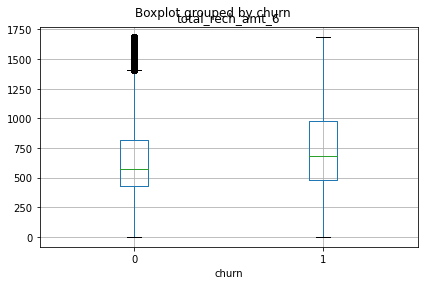

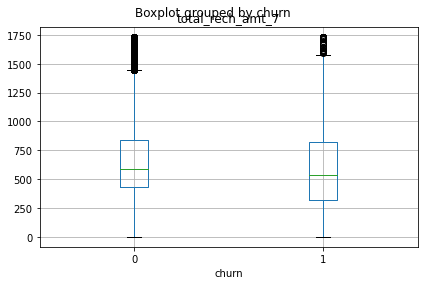

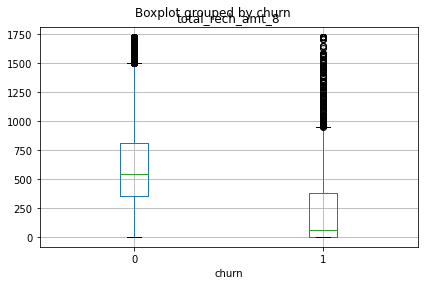

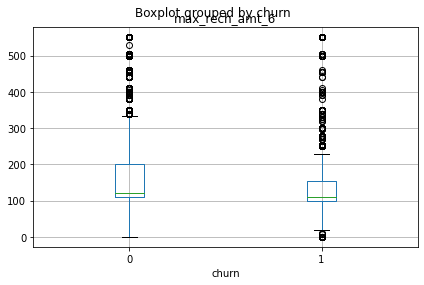

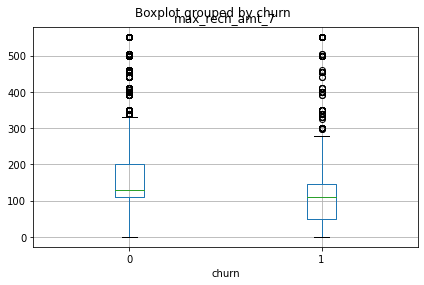

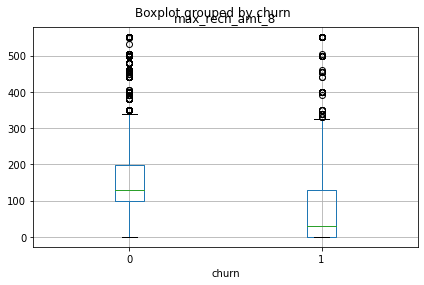

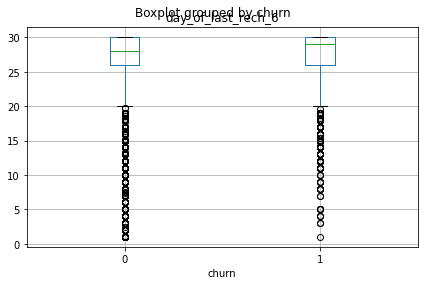

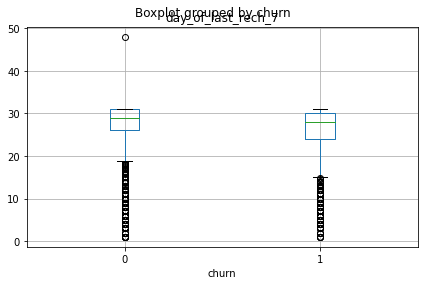

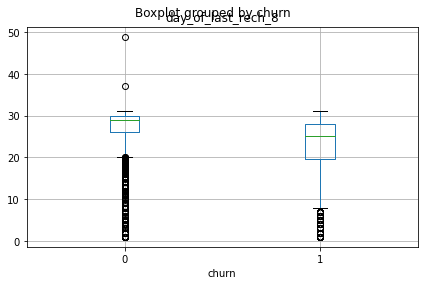

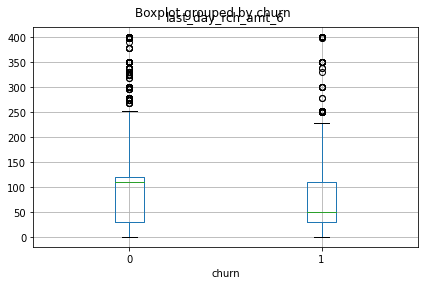

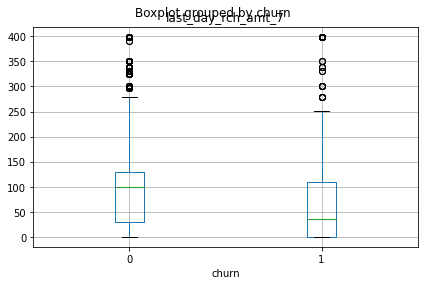

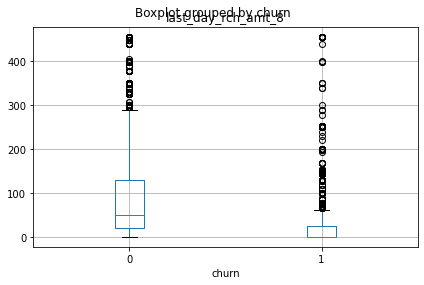

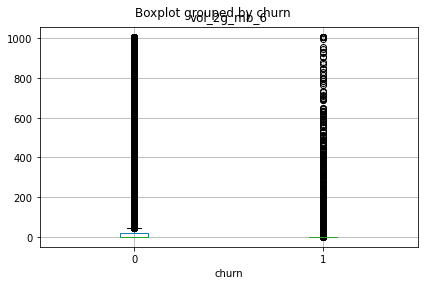

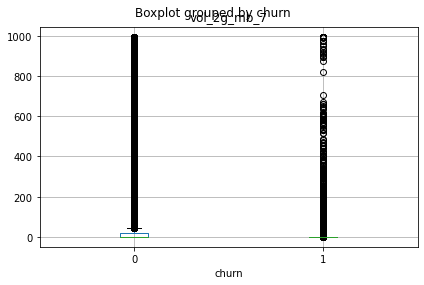

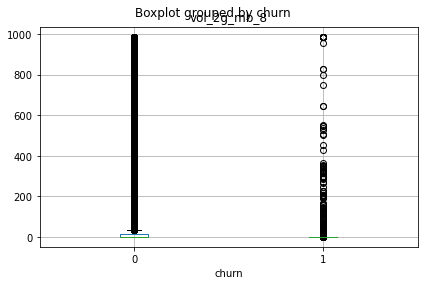

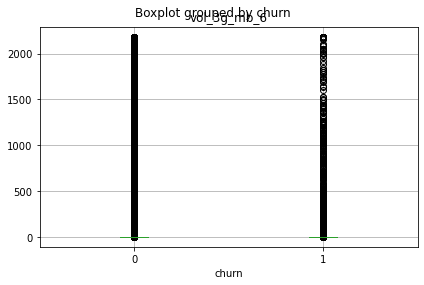

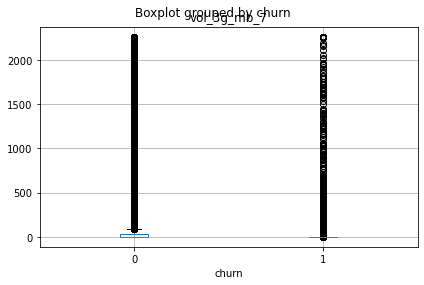

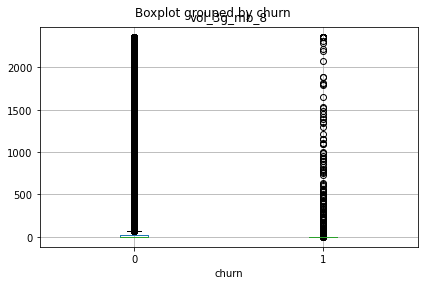

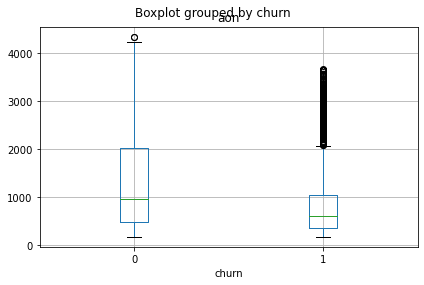

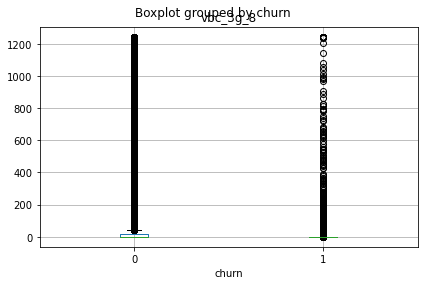

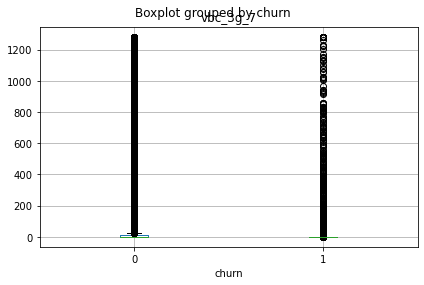

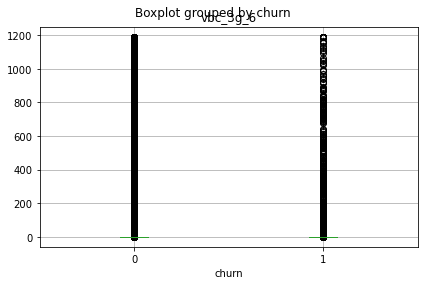

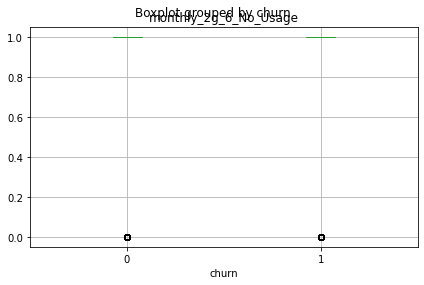

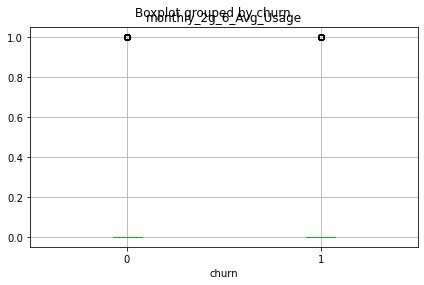

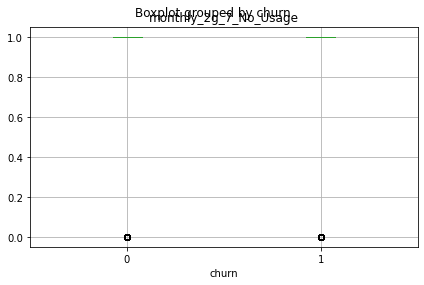

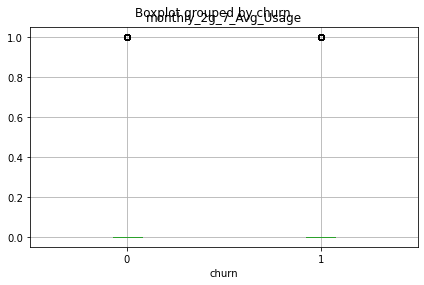

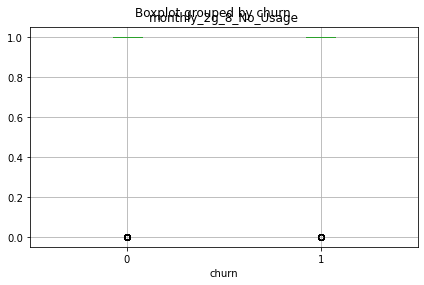

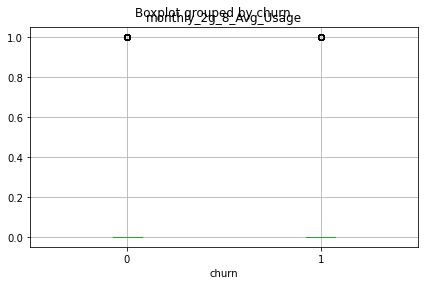

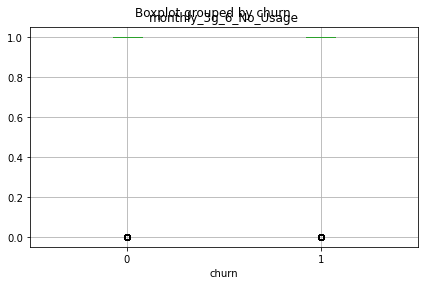

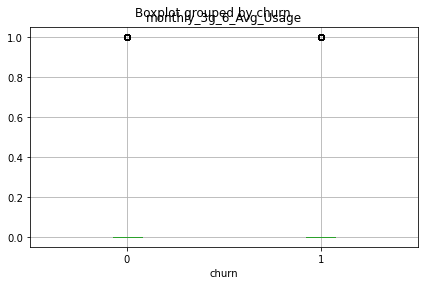

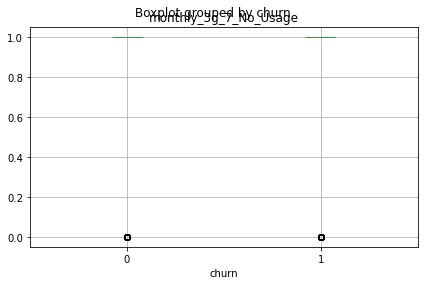

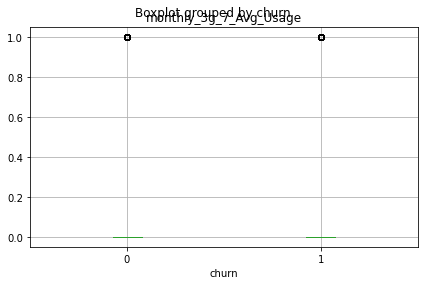

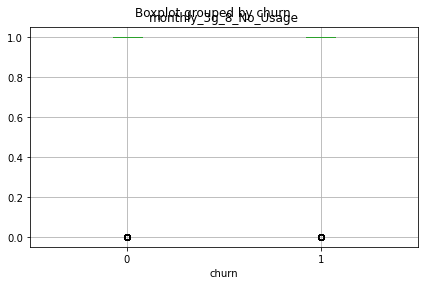

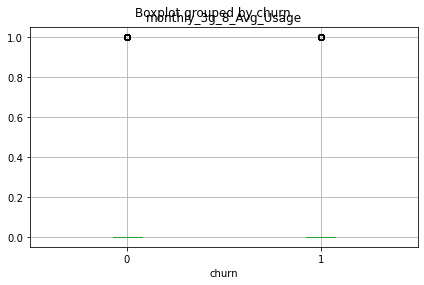

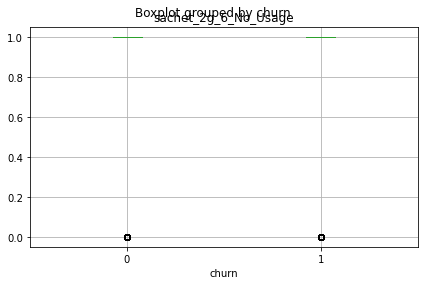

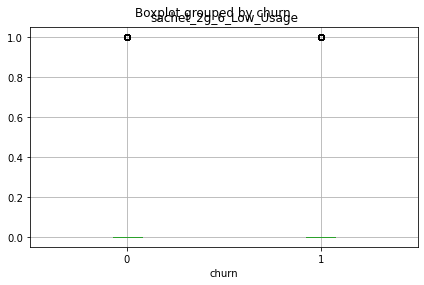

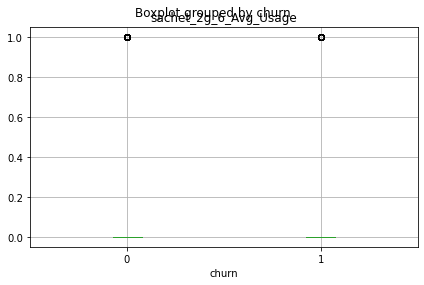

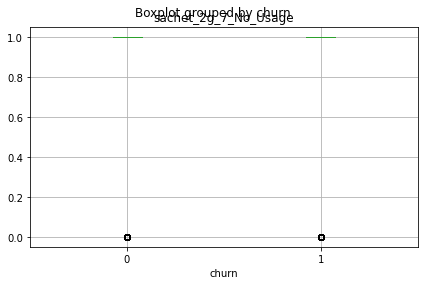

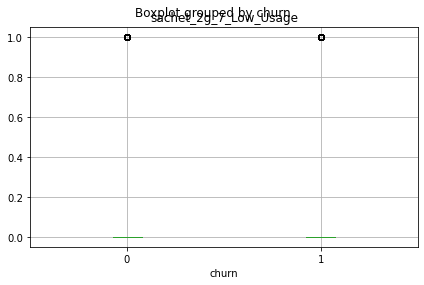

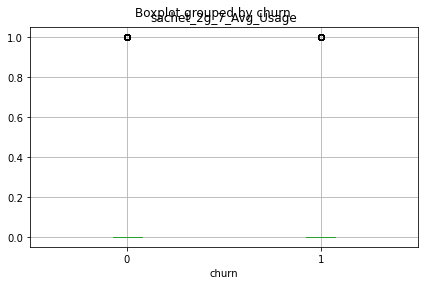

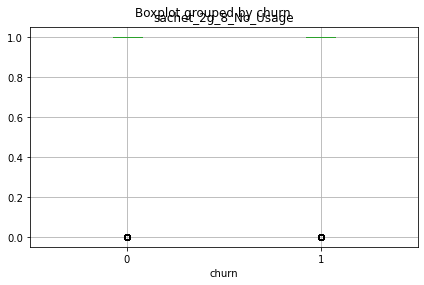

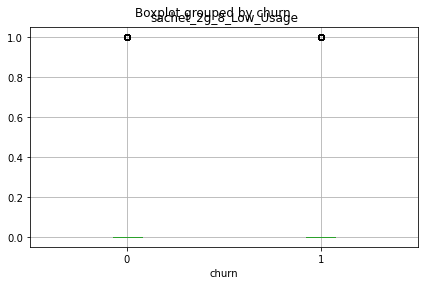

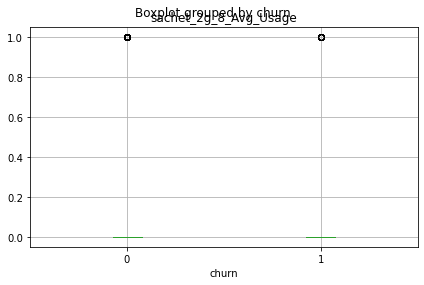

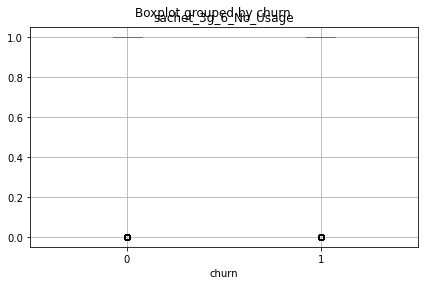

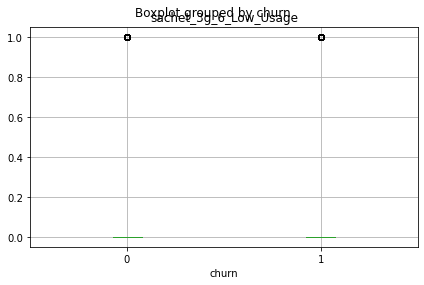

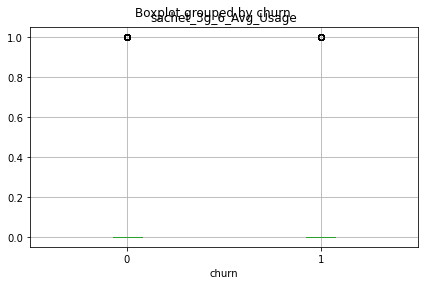

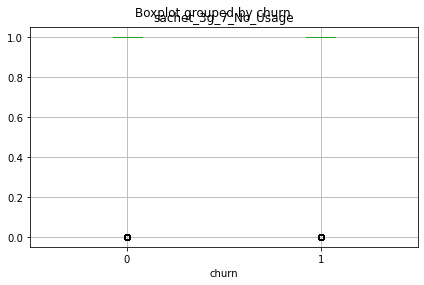

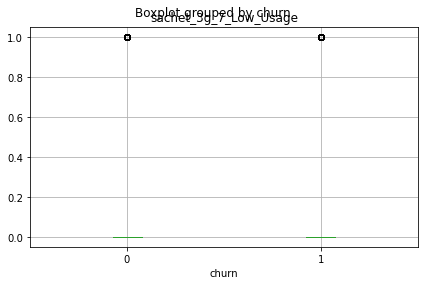

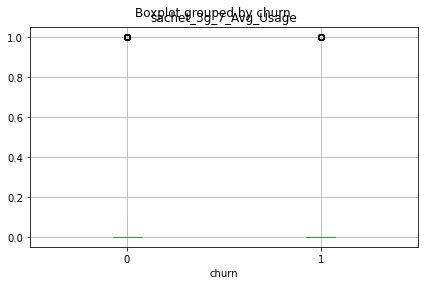

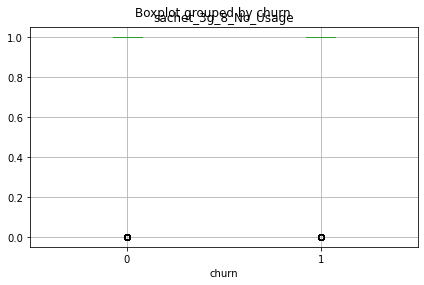

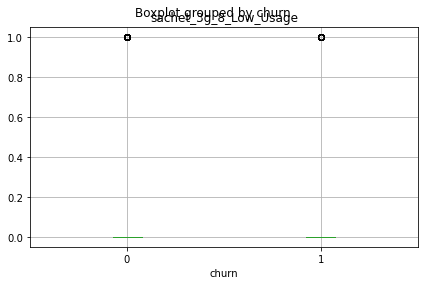

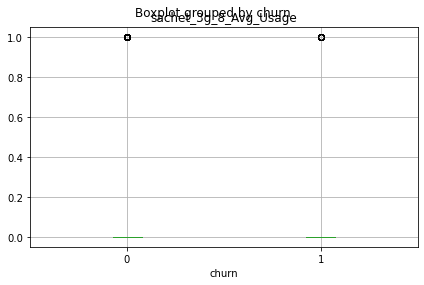

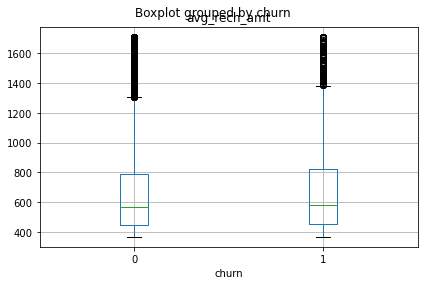

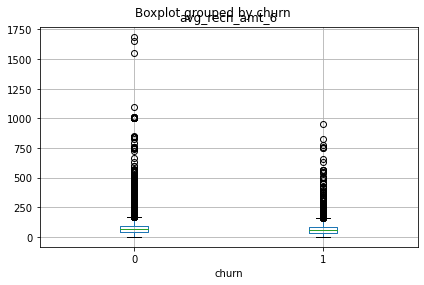

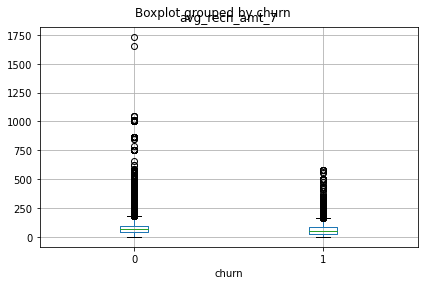

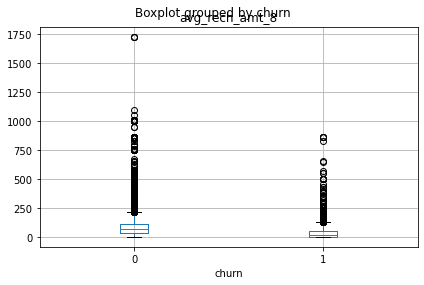

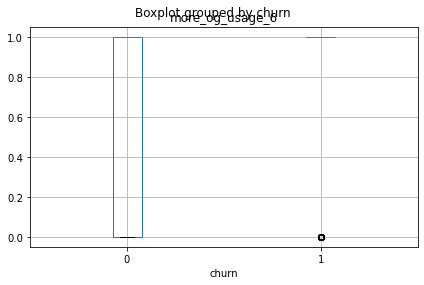

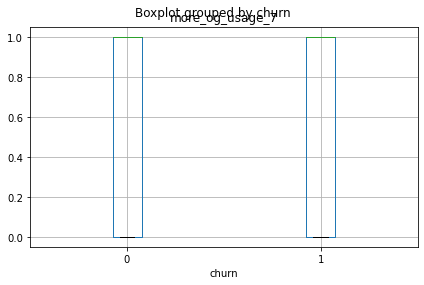

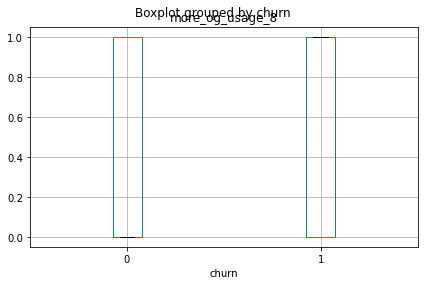

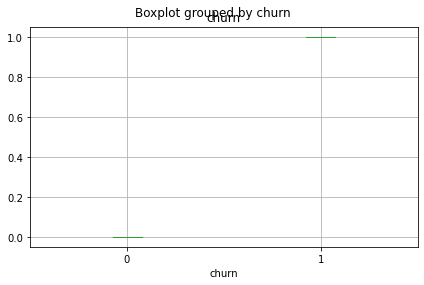

In [92]:
plt.figure(figsize=(8,8))
i=1
for feature in df_hvc.columns:
    df_hvc.boxplot(column=feature,by='churn')
    plt.title(feature)
    plt.tight_layout()
    plt.show()
    i += 1

### With the above bivariate analysis, it is evident that some of the features has high values for members who churned and some of them had low values distinctly.
#### Below are the variables which has high values for the members who gets churned:
    - onnet_mou_6
    - offnet_mou_6
    - roam_ic_mou_8
    - roam_og_mou_8
    - std_og_mou_8

#### Below are the variables which has low values for the members who gets churned:
    - arpu_8
    - offnet_mou_8
    - total_ic_mou_8
    - total_rech_num_8
    - total_rech_amt_8
    - more_og_usage_8

In [93]:
#df_hvc.to_csv('gdrive/My Drive/Colab Notebooks/TeleChurn_Before_Modeling.csv')

# <font color=blue>7. Modelling</font>
## <font color=orange>7.1 Train-Test Split</font>

In [94]:
X = df_hvc.drop('churn', axis=1)
y = df_hvc['churn']
X.shape, y.shape

((30011, 150), (30011,))

In [95]:
#splitting the data set into 70-30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21007, 150), (9004, 150), (21007,), (9004,))

## <font color=orange>7.2 Data Scaling</font>

In [96]:
#scaling using Standard Scaler
stdScaler = StandardScaler()

In [97]:
X_train_scaled = pd.DataFrame(stdScaler.fit_transform(X_train))
X_train_scaled.columns = X_train.columns
X_train_scaled.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0 -0.781621 -0.290386 -0.381067     0.176599     0.769259     0.510564   
1 -0.819103 -0.197484 -0.105826    -0.465357    -0.696384    -0.331866   
2 -0.921420  0.765699  0.135702    -0.703384    -0.544156    -0.464950   
3 -0.248465  0.005804  0.083574    -0.275395     0.372211    -0.397459   
4  0.213964  0.089820 -0.701385    -0.442374    -0.118464    -0.524939   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0     -0.662910     -0.883452     -0.749136      -0.334469      -0.319532   
1     -0.481510     -0.757244     -0.522352      -0.334469      -0.319532   
2     -0.520723      0.379461      0.157692      -0.334469      -0.319532   
3      0.675411      0.569394      1.291501      -0.334469      -0.319532   
4      0.219929     -0.299377     -0.505690      -0.334469      -0.319532   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.351612      -0.362346      -0.330649       -0.35853   
1      -0.351612      -0.362346      -0.330649       -0.35853   
2      -0.351612      -0.362346      -0.330649       -0.35853   
3      -0.351612      -0.362346      -0.330649       -0.35853   
4      -0.351612      -0.362346      -0.330649       -0.35853   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.657431         -0.652971         -0.592100         -0.905235   
1          0.276013         -0.440694          0.528969          0.123003   
2         -0.441935          0.047157          0.105250          0.178343   
3          0.848986          2.903362          0.294780          0.000716   
4         -0.461876         -0.418925         -0.495002          0.341392   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.924845         -0.883749         -0.493823         -0.494862   
1         -0.468768         -0.277808          1.455113          2.089961   
2          1.945880          1.394717         -0.129576          0.145182   
3          0.025062         -0.261161         -0.465541         -0.494862   
4         -0.344731         -0.387131         -0.493823         -0.494862   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.488515          2.078893         -0.356088         -0.348153   
1          4.235464         -0.370038         -0.356088         -0.348153   
2         -0.350227         -0.370038         -0.356088         -0.348153   
3         -0.450397         -0.370038         -0.356088         -0.348153   
4          0.374011         -0.370038         -0.356088         -0.348153   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     -0.920679     -0.939877     -0.880633          0.543067   
1      0.215583     -0.443631      0.177226         -0.554232   
2     -0.109260      1.255183      0.913460         -0.554232   
3      0.292765      1.152658     -0.109266         -0.554232   
4     -0.025978     -0.463522     -0.477032         -0.245604   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0          1.179277          0.867726         -0.187542         -0.407190   
1         -0.560377         -0.516706         -0.603518         -0.604076   
2         -0.560377         -0.516706         -0.603518         -0.571691   
3         -0.531843         -0.507511          0.975457          0.781602   
4          0.088194         -0.367762          0.210919         -0.046916   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.258958         -0.294786         -0.285825         -0.284577   
1         -0.564956         -0.294786         -0.285825         -0.284577   
2         -0.563612         -0.294786         -0.285825         -0.284577   
3          1.918031         -0.294786         -0.285825         -0.284577   
4         -0.300864         -0.294786          1.023347         -0.284577   



## <font color=orange>7.3 Recursive Feature Elimination (RFE) </font>

In [98]:
#Target 'Churn' is Imbalanced,hence using the parameter class_weight = 'balanced' to balance the Target to 50-50 of Churn to Non Churn Customers
logReg = LogisticRegression(class_weight = 'balanced')
#performing RFE with 20 variables
rfe20 = RFE(logReg, 20).fit(X_train_scaled, y_train)
RFE_Sup20 = list(zip(X_train.columns, rfe20.support_, rfe20.ranking_))
df_RFE20 = pd.concat([pd.Series(X_train.columns), pd.Series(rfe20.support_), pd.Series(rfe20.ranking_)], axis=1)
df_RFE20.columns = ['Feature', 'RFE_Support', 'RFE_Ranking']
#df_RFE20.to_csv('df_RFE20.csv')

In [99]:
df_RFE20[df_RFE20['RFE_Support']]

Feature  RFE_Support  RFE_Ranking
1                    arpu_7         True            1
5               onnet_mou_8         True            1
11            roam_ic_mou_8         True            1
17         loc_og_t2t_mou_8         True            1
20         loc_og_t2m_mou_8         True            1
29             loc_og_mou_8         True            1
35         std_og_t2m_mou_8         True            1
41             std_og_mou_8         True            1
51           total_og_mou_8         True            1
63             loc_ic_mou_8         True            1
81             spl_ic_mou_8         True            1
99       day_of_last_rech_8         True            1
102      last_day_rch_amt_8         True            1
109                     aon         True            1
117   monthly_2g_8_No_Usage         True            1
121   monthly_3g_7_No_Usage         True            1
122  monthly_3g_7_Avg_Usage         True            1
123   monthly_3g_8_No_Usage         True            1
124  monthly_3g_8_Avg_Usage         True            1
131    sachet_2g_8_No_Usage         True            1

### We will define two methods to build a logistic regression model and to verify the VIFs as we would be doing this iteratively further.

In [100]:
def build_model(X,y):
    X = sm.add_constant(X)
    logit = sm.GLM(y.values.reshape(-1,1),X,family=sm.families.Binomial()).fit()
    print(logit.summary())
    return logit
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

## <font color=orange>7.4 Logistic Regression</font>

## MODEL 1

In [101]:
#taking the columns as given by RFE
cols1 = list(X_train.columns[rfe20.support_])

In [102]:
logit1 = build_model(X_train_scaled[cols1], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3842.6
Date:                Mon, 30 Nov 2020   Deviance:                       7685.1
Time:                        21:09:44   Pearson chi2:                 1.66e+05
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

In [103]:
checkVIF(X_train_scaled[cols1])

Features    VIF
17   monthly_3g_8_No_Usage  50.13
18  monthly_3g_8_Avg_Usage  48.57
15   monthly_3g_7_No_Usage  43.45
5             loc_og_mou_8  41.83
16  monthly_3g_7_Avg_Usage  41.74
7             std_og_mou_8  31.00
8           total_og_mou_8  29.52
4         loc_og_t2m_mou_8  16.01
1              onnet_mou_8  11.98
6         std_og_t2m_mou_8   9.89
3         loc_og_t2t_mou_8   7.85
9             loc_ic_mou_8   1.72
0                   arpu_7   1.48
12      last_day_rch_amt_8   1.23
2            roam_ic_mou_8   1.21
11      day_of_last_rech_8   1.18
13                     aon   1.13
19    sachet_2g_8_No_Usage   1.05
14   monthly_2g_8_No_Usage   1.04
10            spl_ic_mou_8   1.04

## MODEL 2

In [104]:
#dropping 'monthly_3g_8_No_Usage'
cols2 = cols1.copy()
cols2.remove('monthly_3g_8_No_Usage')

In [105]:
logit2 = build_model(X_train_scaled[cols2], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20987
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3845.2
Date:                Mon, 30 Nov 2020   Deviance:                       7690.3
Time:                        21:09:45   Pearson chi2:                 1.68e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

In [106]:
checkVIF(X_train_scaled[cols2])

Features    VIF
5             loc_og_mou_8  41.82
15   monthly_3g_7_No_Usage  37.59
16  monthly_3g_7_Avg_Usage  36.76
7             std_og_mou_8  30.99
8           total_og_mou_8  29.52
4         loc_og_t2m_mou_8  16.00
1              onnet_mou_8  11.98
6         std_og_t2m_mou_8   9.89
3         loc_og_t2t_mou_8   7.85
9             loc_ic_mou_8   1.72
17  monthly_3g_8_Avg_Usage   1.69
0                   arpu_7   1.48
12      last_day_rch_amt_8   1.23
2            roam_ic_mou_8   1.21
11      day_of_last_rech_8   1.18
13                     aon   1.13
18    sachet_2g_8_No_Usage   1.05
14   monthly_2g_8_No_Usage   1.04
10            spl_ic_mou_8   1.04

## MODEL 3

In [120]:
#dropping 'loc_og_mou_8'
cols3 = cols2.copy()
cols3.remove('loc_og_mou_8')

In [121]:
logit3 = build_model(X_train_scaled[cols3], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20988
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3856.5
Date:                Mon, 30 Nov 2020   Deviance:                       7713.0
Time:                        21:15:08   Pearson chi2:                 3.34e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

In [122]:
checkVIF(X_train_scaled[cols3])

Features    VIF
14   monthly_3g_7_No_Usage  37.59
15  monthly_3g_7_Avg_Usage  36.76
6             std_og_mou_8  21.11
7           total_og_mou_8  20.46
1              onnet_mou_8  11.87
5         std_og_t2m_mou_8   9.80
4         loc_og_t2m_mou_8   4.24
3         loc_og_t2t_mou_8   3.51
8             loc_ic_mou_8   1.72
16  monthly_3g_8_Avg_Usage   1.69
0                   arpu_7   1.48
11      last_day_rch_amt_8   1.23
2            roam_ic_mou_8   1.18
10      day_of_last_rech_8   1.18
12                     aon   1.13
17    sachet_2g_8_No_Usage   1.05
13   monthly_2g_8_No_Usage   1.04
9             spl_ic_mou_8   1.04

## MODEL 4

In [123]:
#dropping 'monthly_3g_7_No_Usage'
cols4 = cols3.copy()
cols4.remove('monthly_3g_7_No_Usage')

In [124]:
logit4 = build_model(X_train_scaled[cols4], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20989
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3864.0
Date:                Mon, 30 Nov 2020   Deviance:                       7727.9
Time:                        21:15:31   Pearson chi2:                 3.11e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

In [125]:
checkVIF(X_train_scaled[cols4])

Features    VIF
6             std_og_mou_8  21.11
7           total_og_mou_8  20.45
1              onnet_mou_8  11.87
5         std_og_t2m_mou_8   9.80
4         loc_og_t2m_mou_8   4.24
3         loc_og_t2t_mou_8   3.51
8             loc_ic_mou_8   1.72
14  monthly_3g_7_Avg_Usage   1.69
15  monthly_3g_8_Avg_Usage   1.68
0                   arpu_7   1.44
11      last_day_rch_amt_8   1.23
10      day_of_last_rech_8   1.18
2            roam_ic_mou_8   1.18
12                     aon   1.13
16    sachet_2g_8_No_Usage   1.05
13   monthly_2g_8_No_Usage   1.04
9             spl_ic_mou_8   1.04

## MODEL 5

In [126]:
#dropping 'std_og_mou_8'
cols5 = cols4.copy()
cols5.remove('std_og_mou_8')

In [127]:
logit5 = build_model(X_train_scaled[cols5], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20990
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3916.2
Date:                Mon, 30 Nov 2020   Deviance:                       7832.4
Time:                        21:16:04   Pearson chi2:                 2.95e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

In [128]:
checkVIF(X_train_scaled[cols5])

Features    VIF
6           total_og_mou_8  16.81
1              onnet_mou_8   8.25
5         std_og_t2m_mou_8   6.14
4         loc_og_t2m_mou_8   3.89
7             loc_ic_mou_8   1.72
13  monthly_3g_7_Avg_Usage   1.69
14  monthly_3g_8_Avg_Usage   1.68
3         loc_og_t2t_mou_8   1.56
0                   arpu_7   1.44
10      last_day_rch_amt_8   1.23
2            roam_ic_mou_8   1.17
9       day_of_last_rech_8   1.17
11                     aon   1.13
15    sachet_2g_8_No_Usage   1.05
8             spl_ic_mou_8   1.04
12   monthly_2g_8_No_Usage   1.04

## MODEL 6

In [132]:
#dropping 'std_og_t2m_mou_8'
cols6 = cols5.copy()
cols6.remove('std_og_t2m_mou_8')

In [133]:
logit6 = build_model(X_train_scaled[cols6], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20991
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3916.3
Date:                Mon, 30 Nov 2020   Deviance:                       7832.6
Time:                        21:17:31   Pearson chi2:                 2.94e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

In [134]:
checkVIF(X_train_scaled[cols6])

Features   VIF
5           total_og_mou_8  3.33
1              onnet_mou_8  2.70
4         loc_og_t2m_mou_8  2.03
6             loc_ic_mou_8  1.72
12  monthly_3g_7_Avg_Usage  1.69
13  monthly_3g_8_Avg_Usage  1.68
3         loc_og_t2t_mou_8  1.56
0                   arpu_7  1.43
9       last_day_rch_amt_8  1.23
8       day_of_last_rech_8  1.17
10                     aon  1.13
2            roam_ic_mou_8  1.10
14    sachet_2g_8_No_Usage  1.05
7             spl_ic_mou_8  1.04
11   monthly_2g_8_No_Usage  1.03

## MODEL 7

In [135]:
#dropping 'loc_og_t2t_mou_8'
cols7 = cols6.copy()
cols7.remove('loc_og_t2t_mou_8')

In [136]:
logit7 = build_model(X_train_scaled[cols7], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20992
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3916.6
Date:                Mon, 30 Nov 2020   Deviance:                       7833.3
Time:                        21:17:54   Pearson chi2:                 3.05e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

In [137]:
checkVIF(X_train_scaled[cols7])

Features   VIF
4           total_og_mou_8  3.32
1              onnet_mou_8  2.44
3         loc_og_t2m_mou_8  1.94
11  monthly_3g_7_Avg_Usage  1.69
12  monthly_3g_8_Avg_Usage  1.68
5             loc_ic_mou_8  1.58
0                   arpu_7  1.43
8       last_day_rch_amt_8  1.23
7       day_of_last_rech_8  1.17
9                      aon  1.13
2            roam_ic_mou_8  1.10
13    sachet_2g_8_No_Usage  1.05
6             spl_ic_mou_8  1.04
10   monthly_2g_8_No_Usage  1.03

## MODEL 8

In [138]:
#dropping 'monthly_3g_7_Avg_Usage'
cols8 = cols7.copy()
cols8.remove('monthly_3g_7_Avg_Usage')

In [139]:
logit8 = build_model(X_train_scaled[cols8], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20993
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3917.5
Date:                Mon, 30 Nov 2020   Deviance:                       7835.0
Time:                        21:18:28   Pearson chi2:                 3.05e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

In [140]:
checkVIF(X_train_scaled[cols8])

Features   VIF
4           total_og_mou_8  3.30
1              onnet_mou_8  2.44
3         loc_og_t2m_mou_8  1.94
5             loc_ic_mou_8  1.58
0                   arpu_7  1.39
8       last_day_rch_amt_8  1.23
7       day_of_last_rech_8  1.17
9                      aon  1.13
11  monthly_3g_8_Avg_Usage  1.12
2            roam_ic_mou_8  1.10
12    sachet_2g_8_No_Usage  1.05
6             spl_ic_mou_8  1.04
10   monthly_2g_8_No_Usage  1.03

## MODEL 9

In [141]:
#dropping 'onnet_mou_8'
cols9 = cols8.copy()
cols9.remove('onnet_mou_8')

In [142]:
logit9 = build_model(X_train_scaled[cols9], y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20994
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3919.0
Date:                Mon, 30 Nov 2020   Deviance:                       7837.9
Time:                        21:19:01   Pearson chi2:                 2.65e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3

In [143]:
checkVIF(X_train_scaled[cols9])

Features   VIF
2         loc_og_t2m_mou_8  1.71
3           total_og_mou_8  1.59
4             loc_ic_mou_8  1.57
0                   arpu_7  1.39
7       last_day_rch_amt_8  1.23
6       day_of_last_rech_8  1.17
8                      aon  1.13
10  monthly_3g_8_Avg_Usage  1.12
1            roam_ic_mou_8  1.09
11    sachet_2g_8_No_Usage  1.05
5             spl_ic_mou_8  1.03
9    monthly_2g_8_No_Usage  1.03

### <font color=green>This model has all the variables significant (p-value is 5% or lesser) and the VIFs are under 2. This is our final model.</font>

### Final features in the order of influence on the model

In [145]:
params_df = pd.DataFrame({'Feature':logit9.params.index, 'Coefficient': logit9.params.values})
params_df['Coefficient_abs'] = params_df['Coefficient'].abs()
params_df.sort_values(by='Coefficient_abs', ascending=False)

Feature  Coefficient  Coefficient_abs
0                    const    -3.897452         3.897452
5             loc_ic_mou_8    -1.143313         1.143313
8       last_day_rch_amt_8    -0.800766         0.800766
4           total_og_mou_8    -0.534988         0.534988
10   monthly_2g_8_No_Usage     0.528932         0.528932
11  monthly_3g_8_Avg_Usage    -0.506065         0.506065
2            roam_ic_mou_8     0.481121         0.481121
6             spl_ic_mou_8    -0.466143         0.466143
7       day_of_last_rech_8    -0.460671         0.460671
9                      aon    -0.348516         0.348516
1                   arpu_7     0.302879         0.302879
12    sachet_2g_8_No_Usage     0.258119         0.258119
3         loc_og_t2m_mou_8    -0.173783         0.173783

## Making predictions on the train data

In [148]:
y_train_pred = logit9.predict(sm.add_constant(X_train_scaled[cols9]))

In [149]:
y_train_pred[:10]

0    0.153176
1    0.002066
2    0.024328
3    0.038673
4    0.009741
5    0.010301
6    0.106124
7    0.009216
8    0.022308
9    0.003671
dtype: float64

In [150]:
#creating a DataFrame having columns Churn and Churn Probability
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'Churn_Probability':y_train_pred})
y_train_pred_final.head()

churn  Churn_Probability
0      0           0.153176
1      0           0.002066
2      0           0.024328
3      0           0.038673
4      0           0.009741

#### Initially, lets assume the probability 0.5 as cutoff to determine the Churn with the predicted probability

In [151]:
#adding a column 'Predicted' to the DataFrame
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_Probability.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

churn  Churn_Probability  Predicted
0      0           0.153176          0
1      0           0.002066          0
2      0           0.024328          0
3      0           0.038673          0
4      0           0.009741          0

## <font color=green>Metrics Evaluation</font>

In [152]:
def metricEvaluation(method, churn, Predicted):
  acc = np.round(accuracy_score(churn, Predicted), 2)
  confusion = confusion_matrix(churn, Predicted)
  #sens = np.round((confusion[1,1] / (confusion[1,1] + confusion[1,0])), 2)
  spec = np.round((confusion[0,0] / (confusion[0,0] + confusion[0,1])), 2)

  prec = np.round(precision_score(churn, Predicted), 2)
  recall = np.round(recall_score(churn, Predicted), 2)

  metricsList = {'Method':method, 'Accuracy':acc, 'Precision':prec, 'Recall/Sensitivity':recall, 'Specificity':spec}
  return metricsList

In [153]:
metrics_df = pd.DataFrame(columns = ['Method', 'Accuracy', 'Precision', 'Recall/Sensitivity', 'Specificity'])

In [154]:
metrics_df = metrics_df.append(metricEvaluation('Logit_Train_cutoff_0.5', y_train_pred_final.churn, y_train_pred_final.Predicted), ignore_index=True)
metrics_df

Method  Accuracy  Precision  Recall/Sensitivity  \
0  Logit_Train_cutoff_0.5      0.93       0.67                0.35   

   Specificity  
0         0.98

### Precision Recall Curve

In [155]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.churn, y_train_pred_final.Churn_Probability)

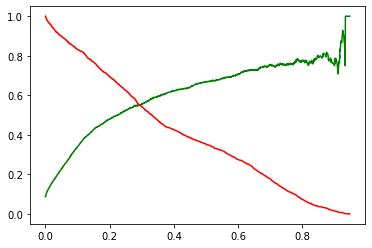

In [156]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### <font color=green>By the above precision recall tradeoff curve, the probability cutoff 0.27 seems to be an ideal pick</font>
Let's predict the Churn with the _0.27 cutoff_ and re-evaluate the metrics

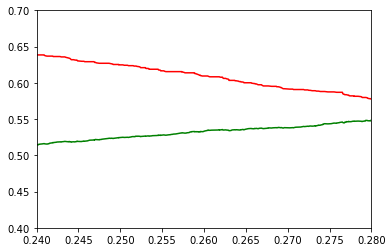

In [157]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.ylim([0.4,0.7])
plt.xlim([0.24,0.28])
plt.show()

In [158]:
y_train_pred_final['Predicted_PR'] = y_train_pred_final.Churn_Probability.map(lambda x: 1 if x>0.27 else 0)
y_train_pred_final.head()

churn  Churn_Probability  Predicted  Predicted_PR
0      0           0.153176          0             0
1      0           0.002066          0             0
2      0           0.024328          0             0
3      0           0.038673          0             0
4      0           0.009741          0             0

In [159]:
metrics_df = metrics_df.append(metricEvaluation('Logit_Train_cutoff_0.27', y_train_pred_final.churn, y_train_pred_final.Predicted_PR), ignore_index=True)
metrics_df

Method  Accuracy  Precision  Recall/Sensitivity  \
0   Logit_Train_cutoff_0.5      0.93       0.67                0.35   
1  Logit_Train_cutoff_0.27      0.92       0.54                0.59   

   Specificity  
0         0.98  
1         0.95

### Receiver Operating Characteristic Curve (ROC Curve)

In [160]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC Curve Area = %0.2f' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

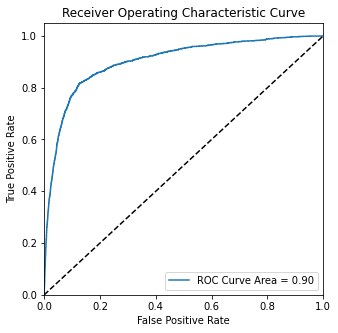

In [161]:
draw_roc(y_train_pred_final.churn, y_train_pred_final.Churn_Probability)

#### <font color=green>The ROC area of 0.90 indicates significantly a good model</font>

#### Identify the prediction for all probabilities from 0.0 to 0.9 and later to see the trade-off between Sensitivity and Specificity for all the probabilities to arrive at an optimal cutoff probability

In [162]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Churn_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

churn  Churn_Probability  Predicted  Predicted_PR  0.0  0.1  0.2  0.3  0.4  \
0      0           0.153176          0             0    1    1    0    0    0   
1      0           0.002066          0             0    1    0    0    0    0   
2      0           0.024328          0             0    1    0    0    0    0   
3      0           0.038673          0             0    1    0    0    0    0   
4      0           0.009741          0             0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    0    0    0    0    0  
4    0    0    0    0    0

#### Identify the metrics accuracy, sensitivity & specifity for all the different predictions

In [163]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity', 'Precision', 'Recall'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = confusion_matrix(y_train_pred_final.churn, y_train_pred_final[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    prec = precision_score(y_train_pred_final.churn, y_train_pred_final[i])
    recall = recall_score(y_train_pred_final.churn, y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity, prec, recall]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.086781     1.000000     0.000000   0.086781  1.000000
0.1          0.1  0.845290     0.832693     0.846487   0.340130  0.832693
0.2          0.2  0.908078     0.694460     0.928378   0.479545  0.694460
0.3          0.3  0.922930     0.543609     0.958976   0.557368  0.543609
0.4          0.4  0.927976     0.426769     0.975605   0.624398  0.426769
0.5          0.5  0.928595     0.352167     0.983372   0.668054  0.352167
0.6          0.6  0.927120     0.274822     0.989106   0.705634  0.274822
0.7          0.7  0.923644     0.177180     0.994579   0.756440  0.177180
0.8          0.8  0.917885     0.075151     0.997967   0.778409  0.075151
0.9          0.9  0.914171     0.015908     0.999531   0.763158  0.015908


#### Accuracy, Sensitivity, Specificity Trade-off

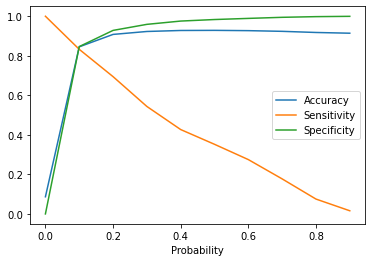

In [164]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

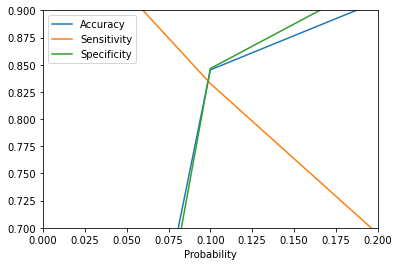

In [165]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.xlim([0,0.2])
plt.ylim([0.7,0.9])
plt.show()

#### From the above Sensitivity-Specificity tradeoff curve, it seems to be 0.1 might be an optimal cutoff.

In [166]:
y_train_pred_final['Predicted_SS'] = y_train_pred_final.Churn_Probability.map( lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()

churn  Churn_Probability  Predicted  Predicted_PR  0.0  0.1  0.2  0.3  0.4  \
0      0           0.153176          0             0    1    1    0    0    0   
1      0           0.002066          0             0    1    0    0    0    0   
2      0           0.024328          0             0    1    0    0    0    0   
3      0           0.038673          0             0    1    0    0    0    0   
4      0           0.009741          0             0    1    0    0    0    0   

   0.5  0.6  0.7  0.8  0.9  Predicted_SS  
0    0    0    0    0    0             1  
1    0    0    0    0    0             0  
2    0    0    0    0    0             0  
3    0    0    0    0    0             0  
4    0    0    0    0    0             0

#### Compute Metrics

In [167]:
metrics_df = metrics_df.append(metricEvaluation('Logit_Train_cutoff_0.1', y_train_pred_final.churn, y_train_pred_final.Predicted_SS), ignore_index=True)
metrics_df

Method  Accuracy  Precision  Recall/Sensitivity  \
0   Logit_Train_cutoff_0.5      0.93       0.67                0.35   
1  Logit_Train_cutoff_0.27      0.92       0.54                0.59   
2   Logit_Train_cutoff_0.1      0.85       0.34                0.83   

   Specificity  
0         0.98  
1         0.95  
2         0.85

#### Though both the cutoffs have very close metric values, as we need to  target the high Recall/Sensitivity, lets stick to the cutoff 0.1

## Making predictions on the test data
### Scale the test data as well using the same scaler instance

In [168]:
X_test_scaled = pd.DataFrame(stdScaler.transform(X_test))
X_test_scaled.columns = X_test.columns

X_test_scaled.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  0.961557 -0.765995 -1.516602    -0.716294    -0.678651    -0.699847   
1  0.378132  0.279759 -0.999777     2.435033     2.889126     0.037351   
2 -0.929782 -0.199901  0.261442    -0.763962    -0.768160    -0.697116   
3 -0.119438 -0.027592 -0.077491    -0.744951    -0.706205    -0.673747   
4 -0.638320 -0.916679 -0.674065     3.224450     3.220540     3.467244   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0      3.085366      0.425615     -0.981895      -0.334469      -0.319532   
1      0.146648     -0.166854     -0.796401      -0.334469      -0.302781   
2     -1.032067     -1.017109     -0.897605      -0.334469      -0.319532   
3     -0.341938     -0.034330     -0.414640      -0.334469      -0.319532   
4     -1.040735     -1.058863     -0.992021      -0.334469      -0.319532   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0      -0.351612      -0.362346      -0.330649       -0.35853   
1      -0.323272      -0.362346      -0.308376       -0.26115   
2      -0.351612      -0.362346      -0.330649       -0.35853   
3      -0.351612      -0.362346      -0.330649       -0.35853   
4      -0.351612      -0.362346      -0.330649       -0.35853   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0         -0.524950         -0.546920         -0.654057         -0.290938   
1         -0.255794         -0.366380         -0.328718         -0.884881   
2         -0.624653         -0.670719         -0.633923         -0.825438   
3         -0.567313         -0.472169         -0.559521          0.443325   
4          3.935608          3.922931          4.009055         -0.840178   

   loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0         -0.567048         -0.886151         -0.382407         -0.152315   
1         -0.799039         -0.882520         -0.493823         -0.494862   
2         -0.841103         -0.744204         -0.121863         -0.114066   
3          0.844961          0.217861          1.114006          1.592717   
4         -0.903675         -0.891346         -0.157002         -0.494862   

   loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0         -0.488515         -0.126766         -0.356088         -0.348153   
1         -0.488515          0.132723         -0.356088         -0.348153   
2          0.274727         -0.370038         -0.356088         -0.348153   
3          0.237496         -0.370038         -0.356088         -0.348153   
4         -0.488515         -0.370038         -0.356088         -0.348153   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0     -0.460336     -0.647308     -0.907195         -0.537412   
1     -0.741915     -0.738985     -0.773499          2.994262   
2     -0.839724     -0.876228     -0.773351         -0.554232   
3      0.063334      0.381709     -0.108638         -0.554232   
4      3.105678      3.110508      3.150379         -0.554232   

   std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0         -0.502596         -0.512542          3.446513          0.940059   
1          3.351498          0.213620          0.757773          0.372656   
2         -0.560377         -0.516706         -0.603518         -0.604076   
3         -0.560377         -0.516706         -0.598964         -0.480040   
4         -0.560377         -0.516706         -0.603518         -0.603026   

   std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         -0.552826         -0.294786         -0.285825         -0.284577   
1         -0.371838         -0.283363         -0.285825         -0.284577   
2         -0.564956         -0.294786         -0.285825         -0.284577   
3         -0.564956         -0.294786         -0.285825         -0.284577   
4         -0.560358         -0.294786         -0.285825         -0.284577   



In [170]:
X_test_sm = sm.add_constant(X_test_scaled[cols9])
X_test_sm.shape

(9004, 13)

### Make predictions on the test data with the final model

In [172]:
y_test_pred = logit9.predict(X_test_sm)

In [173]:
y_test_pred[:10]

0    0.166409
1    0.048825
2    0.001926
3    0.022136
4    0.024898
5    0.040524
6    0.346405
7    0.000320
8    0.003230
9    0.276840
dtype: float64

In [174]:
y_test_pred = y_test_pred.values.reshape(-1)

In [175]:
#creating a DataFrame for the Test Set 
y_test_pred_final = pd.DataFrame({'churn':y_test.values, 'Churn_Probability':y_test_pred})
y_test_pred_final.head()

churn  Churn_Probability
0      0           0.166409
1      0           0.048825
2      0           0.001926
3      0           0.022136
4      0           0.024898

#### <font color=green>As finalized the probability cutoff as 0.1, lets make predictions with the same cutoff</font>

In [176]:
#adding 'Predicted' column to the DataFrame
y_test_pred_final['Predicted'] = y_test_pred_final.Churn_Probability.map( lambda x: 1 if x > 0.1 else 0)
y_test_pred_final.head()

churn  Churn_Probability  Predicted
0      0           0.166409          1
1      0           0.048825          0
2      0           0.001926          0
3      0           0.022136          0
4      0           0.024898          0

### Metric Evaluation on Test Data

In [177]:
metrics_df = metrics_df.append(metricEvaluation('Logit_Test_cutoff_0.1', y_test_pred_final.churn, y_test_pred_final.Predicted), ignore_index=True)
metrics_df

Method  Accuracy  Precision  Recall/Sensitivity  \
0   Logit_Train_cutoff_0.5      0.93       0.67                0.35   
1  Logit_Train_cutoff_0.27      0.92       0.54                0.59   
2   Logit_Train_cutoff_0.1      0.85       0.34                0.83   
3    Logit_Test_cutoff_0.1      0.85       0.34                0.85   

   Specificity  
0         0.98  
1         0.95  
2         0.85  
3         0.85

## <font color=orange>7.5 Principal Component Analysis</font>
### Logistic Regression with PCA

In [178]:
pca = PCA(random_state=100)

In [179]:
pca.fit(X_train_scaled)

PCA(random_state=100)

In [180]:
#checking the % variance explained by each principal component
var_cumu = np.cumsum(pca.explained_variance_ratio_)

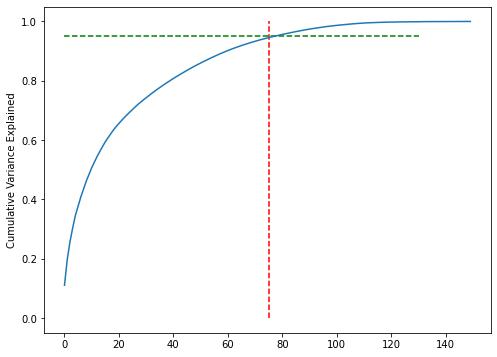

In [181]:
fig = plt.figure(figsize=[8,6])
plt.vlines(x=75, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=130, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative Variance Explained")
plt.show()

PCA with 75 components

In [182]:
pca_final = IncrementalPCA(n_components=75)

In [183]:
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_train_pca.shape

(21007, 75)

Applying the transformation on the test set

In [184]:
X_test_pca = pca_final.transform(X_test_scaled)
X_test_pca.shape

(9004, 75)

### Applying logistic regression on Principal components



In [185]:
#Using class_weight='balanced' because data is Imbalanced
logit_pca = LogisticRegression(class_weight='balanced')

In [186]:
model_pca = logit_pca.fit(X_train_pca, y_train)

In [187]:
pca_pred_probs_train = model_pca.predict_proba(X_train_pca)

In [188]:
#creating a DataFrame
y_train_pred_pca = pd.DataFrame({'churn':y_train.values, 'Churn_Probability':pca_pred_probs_train[:,1]})
y_train_pred_pca.head()

churn  Churn_Probability
0      0           0.278437
1      0           0.053639
2      0           0.429382
3      0           0.163260
4      0           0.109827

In [189]:
#checking the area under the ROC curve
"{:2.2}".format(metrics.roc_auc_score(y_train, pca_pred_probs_train[:,1]))

'0.91'

In [190]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_pca[i]= y_train_pred_pca.Churn_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_pca.head()

churn  Churn_Probability  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0      0           0.278437    1    1    1    0    0    0    0    0    0    0
1      0           0.053639    1    0    0    0    0    0    0    0    0    0
2      0           0.429382    1    1    1    1    1    0    0    0    0    0
3      0           0.163260    1    1    0    0    0    0    0    0    0    0
4      0           0.109827    1    1    0    0    0    0    0    0    0    0

In [191]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificity', 'Precision', 'Recall'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = confusion_matrix(y_train_pred_pca.churn, y_train_pred_pca[i])
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    prec = precision_score(y_train_pred_pca.churn, y_train_pred_pca[i])
    recall = recall_score(y_train_pred_pca.churn, y_train_pred_pca[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity, prec, recall]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificity  Precision    Recall
0.0          0.0  0.086781     1.000000     0.000000   0.086781  1.000000
0.1          0.1  0.440901     0.975864     0.390065   0.131973  0.975864
0.2          0.2  0.609464     0.945145     0.577565   0.175333  0.945145
0.3          0.3  0.719617     0.917718     0.700792   0.225685  0.917718
0.4          0.4  0.800067     0.886451     0.791858   0.288108  0.886451
0.5          0.5  0.849241     0.839276     0.850188   0.347411  0.839276
0.6          0.6  0.880802     0.784421     0.889960   0.403841  0.784421
0.7          0.7  0.902271     0.710916     0.920455   0.459249  0.710916
0.8          0.8  0.919551     0.599013     0.950010   0.532423  0.599013
0.9          0.9  0.925311     0.403730     0.974875   0.604269  0.403730


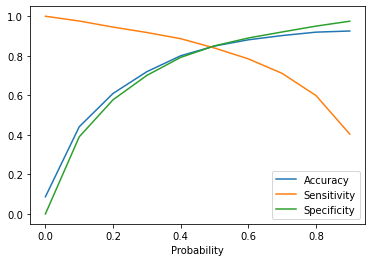

In [192]:
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [193]:
#adding 'Predicted' column to the DataFrame
y_train_pred_pca['Predicted_final'] = y_train_pred_pca.Churn_Probability.map( lambda x: 1 if x > 0.5 else 0)
y_train_pred_pca.head()

churn  Churn_Probability  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  \
0      0           0.278437    1    1    1    0    0    0    0    0    0    0   
1      0           0.053639    1    0    0    0    0    0    0    0    0    0   
2      0           0.429382    1    1    1    1    1    0    0    0    0    0   
3      0           0.163260    1    1    0    0    0    0    0    0    0    0   
4      0           0.109827    1    1    0    0    0    0    0    0    0    0   

   Predicted_final  
0                0  
1                0  
2                0  
3                0  
4                0

In [194]:
metrics_df = metrics_df.append(metricEvaluation('Logit_PCA_Train_cutoff_0.5', y_train_pred_pca.churn, y_train_pred_pca.Predicted_final), ignore_index=True)
metrics_df

Method  Accuracy  Precision  Recall/Sensitivity  \
0      Logit_Train_cutoff_0.5      0.93       0.67                0.35   
1     Logit_Train_cutoff_0.27      0.92       0.54                0.59   
2      Logit_Train_cutoff_0.1      0.85       0.34                0.83   
3       Logit_Test_cutoff_0.1      0.85       0.34                0.85   
4  Logit_PCA_Train_cutoff_0.5      0.85       0.35                0.84   

   Specificity  
0         0.98  
1         0.95  
2         0.85  
3         0.85  
4         0.85

Making predictions on the test set

In [195]:
pca_pred_probs_test = model_pca.predict_proba(X_test_pca)

In [196]:
#creating DataFrame
y_test_pred_pca = pd.DataFrame({'churn':y_test.values, 'Churn_Probability':pca_pred_probs_test[:,1]})
y_test_pred_pca.head()

churn  Churn_Probability
0      0           0.816989
1      0           0.765244
2      0           0.084248
3      0           0.170378
4      0           0.185972

In [197]:
#checking area under the ROC curve
"{:2.2}".format(metrics.roc_auc_score(y_test, pca_pred_probs_test[:,1]))

'0.91'

In [198]:
y_test_pred_pca['Predicted_final'] = y_test_pred_pca.Churn_Probability.map( lambda x: 1 if x > 0.5 else 0)
y_test_pred_pca.head()

churn  Churn_Probability  Predicted_final
0      0           0.816989                1
1      0           0.765244                1
2      0           0.084248                0
3      0           0.170378                0
4      0           0.185972                0

In [199]:
metrics_df = metrics_df.append(metricEvaluation('Logit_PCA_Test_cutoff_0.5', y_test_pred_pca.churn, y_test_pred_pca.Predicted_final), ignore_index=True)
metrics_df

Method  Accuracy  Precision  Recall/Sensitivity  \
0      Logit_Train_cutoff_0.5      0.93       0.67                0.35   
1     Logit_Train_cutoff_0.27      0.92       0.54                0.59   
2      Logit_Train_cutoff_0.1      0.85       0.34                0.83   
3       Logit_Test_cutoff_0.1      0.85       0.34                0.85   
4  Logit_PCA_Train_cutoff_0.5      0.85       0.35                0.84   
5   Logit_PCA_Test_cutoff_0.5      0.85       0.35                0.86   

   Specificity  
0         0.98  
1         0.95  
2         0.85  
3         0.85  
4         0.85  
5         0.85

## <font color=orange>7.6 Decision Tree Model</font>

Fit a basic decision tree module with some assumed values for hyper-parameters.

In [200]:
#buiding a Decision Tree model and balancing the Imbalanced data using the parameter class_weight='balanced'
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, class_weight='balanced', random_state=100)

In [201]:
%%time
dt.fit(X_train, y_train)

CPU times: user 1.69 s, sys: 63.5 ms, total: 1.75 s
Wall time: 1.87 s


DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, random_state=100)

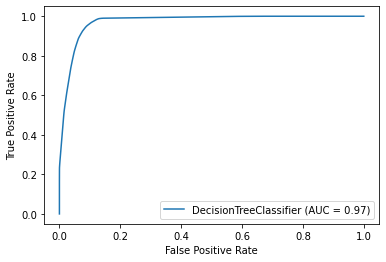

In [202]:
plot_roc_curve(dt, X_train, y_train)
plt.show()

0.97 is a very good ROC Curve Area. Seems a good model.

### Hyper-parameter tuning for the Random Forest

Will perform a grid search cross validation for max_depth, min_samples_leaf and criterion hyper-parameters with possible range of values.

In [203]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=10)

In [204]:
#taking a wide range of parameters for max_depth,min_samples_leaf,criterion
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [205]:
grid_search_dt = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [206]:
%%time
grid_search_dt.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.5min finished


CPU times: user 2.23 s, sys: 304 ms, total: 2.54 s
Wall time: 1min 31s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='recall', verbose=1)

Identify the best sccore & best values for hyper-parameters through grid search cross validation.

In [207]:
grid_search_dt.best_score_

0.8491481106612685

In [208]:
dt_best = grid_search_dt.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=100, random_state=10)

Based on the chosen best hyper-parameters, lets concentrate around expanding in that range and will once again see if still it can be tuned.

In [209]:
#taking a wide range of parameters for max_depth tuning it based on the best DT score
params1 = {
    'max_depth': [8,9,10,11,12],
    'min_samples_leaf': [75, 100, 150, 200, 250, 300],
    'criterion': ["gini", "entropy"]
}

In [210]:
grid_search_dt1 = GridSearchCV(estimator=dt, 
                           param_grid=params1, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [211]:
%%time
grid_search_dt1.fit(X_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.9min finished


CPU times: user 2.32 s, sys: 270 ms, total: 2.59 s
Wall time: 1min 52s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=10),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 9, 10, 11, 12],
                         'min_samples_leaf': [75, 100, 150, 200, 250, 300]},
             scoring='recall', verbose=1)

Again, lets identify the best sccore & best values for hyper-parameters through grid search cross validation.

In [212]:
grid_search_dt1.best_score_

0.8842502891844998

In [213]:
dt_best = grid_search_dt1.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_leaf=250, random_state=10)

As Decision Tree provides the importance of features in the model, lets sort the top 10 important features.

In [214]:
dt_imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt_best.feature_importances_
})

In [215]:
dt_imp_df.sort_values(by='Importance', ascending=False).head(10)

Feature  Importance
78       total_ic_mou_8    0.530486
14        roam_og_mou_8    0.099348
99   day_of_last_rech_8    0.097915
102  last_day_rch_amt_8    0.097077
29         loc_og_mou_8    0.026058
13        roam_og_mou_7    0.014156
89     total_rech_num_7    0.013456
93     total_rech_amt_8    0.010495
2                arpu_8    0.009414
63         loc_ic_mou_8    0.009199

Lets predict the values both on train & test data.

In [216]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

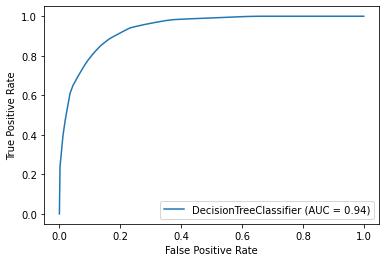

In [217]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

0.94 is still a very good ROC Curve Area. Seems a good model.
__Lets look at classification report.__

In [218]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.90      8234
           1       0.33      0.88      0.48       770

    accuracy                           0.84      9004
   macro avg       0.66      0.86      0.69      9004
weighted avg       0.93      0.84      0.87      9004



Compute all the required metrics for the Decision Tree model train & test data.

In [219]:
metrics_df = metrics_df.append(metricEvaluation('Decision_Tree_Train', y_train, y_train_pred), ignore_index=True)
metrics_df = metrics_df.append(metricEvaluation('Decision_Tree_Test', y_test, y_test_pred), ignore_index=True)
metrics_df

Method  Accuracy  Precision  Recall/Sensitivity  \
0      Logit_Train_cutoff_0.5      0.93       0.67                0.35   
1     Logit_Train_cutoff_0.27      0.92       0.54                0.59   
2      Logit_Train_cutoff_0.1      0.85       0.34                0.83   
3       Logit_Test_cutoff_0.1      0.85       0.34                0.85   
4  Logit_PCA_Train_cutoff_0.5      0.85       0.35                0.84   
5   Logit_PCA_Test_cutoff_0.5      0.85       0.35                0.86   
6         Decision_Tree_Train      0.84       0.34                0.89   
7          Decision_Tree_Test      0.84       0.33                0.88   

   Specificity  
0         0.98  
1         0.95  
2         0.85  
3         0.85  
4         0.85  
5         0.85  
6         0.84  
7         0.84

## <font color=orange>7.7 Random Forest Model</font>

Fit a basic random forest module with some assumed values for hyper-parameters.

In [220]:
#building Random Forest Model using parameter class_weight='balanced' since data is Imbalanced
rf = RandomForestClassifier(n_estimators=10, max_depth=10, max_features=5, class_weight='balanced', random_state=100, oob_score=True)

In [221]:
%%time
rf.fit(X_train, y_train)

CPU times: user 506 ms, sys: 18.8 ms, total: 525 ms
Wall time: 532 ms


RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=5,
                       n_estimators=10, oob_score=True, random_state=100)

In [222]:
rf.oob_score_

0.908744704146237

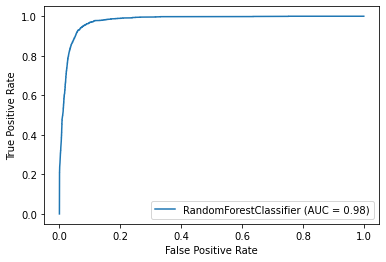

In [223]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

Will perform a grid search cross validation for max_depth, min_samples_leaf and n_estimators hyper-parameters with possible range of values.

In [224]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)

In [225]:
#taking a wide range of parameters for max_depth,min_samples_leaf,criterion
params = {
    'max_depth': [2,3,5,10,15,20],
    'min_samples_leaf': [5,10,15,20,25],
    'n_estimators': [10,15,20,25,30]
}

In [226]:
grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [227]:
%%time
grid_search_rf.fit(X_train, y_train)

Fitting 4 folds for each of 150 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.4min finished


CPU times: user 4.68 s, sys: 431 ms, total: 5.11 s
Wall time: 4min 24s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 15, 20],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 15, 20, 25, 30]},
             scoring='recall', verbose=1)

Identify the best sccore & best values for hyper-parameters through grid search cross validation.

In [228]:
grid_search_rf.best_score_

0.759177993059572

In [229]:
rf_best = grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

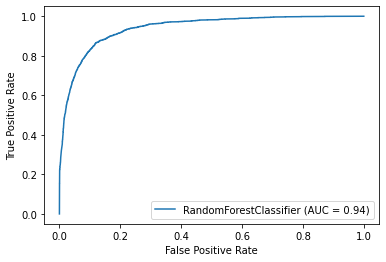

In [230]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

Based on the chosen best hyper-parameters, lets concentrate around expanding in that range and will once again see if still it can be tuned.

In [231]:
#taking a wide range of parameters for max_depth,min_samples_leaf tuning it based on the best RF score
params1 = {
    'max_depth': [3,4,5,6,8],
    'min_samples_leaf': [18,20,22],
    'n_estimators': [18,20,22]
}

In [232]:
grid_search_rf1 = GridSearchCV(estimator=rf,
                           param_grid=params1,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [233]:
%%time
grid_search_rf1.fit(X_train, y_train)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.1min finished


CPU times: user 2.48 s, sys: 174 ms, total: 2.65 s
Wall time: 1min 5s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 8],
                         'min_samples_leaf': [18, 20, 22],
                         'n_estimators': [18, 20, 22]},
             scoring='recall', verbose=1)

Again, lets identify the best sccore & best values for hyper-parameters through grid search cross validation.

In [234]:
grid_search_rf1.best_score_

0.7624674667437825

In [235]:
rf_best = grid_search_rf1.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_leaf=22, n_estimators=20, n_jobs=-1,
                       random_state=42)

As Random Forest provides the importance of features in the model, lets sort the top 10 important features.

In [236]:
rf_imp_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_best.feature_importances_
})

In [237]:
rf_imp_df.sort_values(by='Importance', ascending=False).head(10)

Feature  Importance
14        roam_og_mou_8    0.099071
2                arpu_8    0.095782
63         loc_ic_mou_8    0.092629
54     loc_ic_t2t_mou_8    0.068375
78       total_ic_mou_8    0.063733
11        roam_ic_mou_8    0.062146
51       total_og_mou_8    0.056684
93     total_rech_amt_8    0.051043
96       max_rech_amt_8    0.048884
102  last_day_rch_amt_8    0.043246

Lets predict the values both on train & test data.

In [238]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

Lets look at classification report.

In [239]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8234
           1       0.48      0.81      0.60       770

    accuracy                           0.91      9004
   macro avg       0.73      0.87      0.78      9004
weighted avg       0.94      0.91      0.92      9004



Compute all the required metrics for the Random Forest model train & test data.

In [240]:
metrics_df = metrics_df.append(metricEvaluation('Random_Forest_Train', y_train, y_train_pred), ignore_index=True)
metrics_df = metrics_df.append(metricEvaluation('Random_Forest_Test', y_test, y_test_pred), ignore_index=True)
metrics_df

Method  Accuracy  Precision  Recall/Sensitivity  \
0      Logit_Train_cutoff_0.5      0.93       0.67                0.35   
1     Logit_Train_cutoff_0.27      0.92       0.54                0.59   
2      Logit_Train_cutoff_0.1      0.85       0.34                0.83   
3       Logit_Test_cutoff_0.1      0.85       0.34                0.85   
4  Logit_PCA_Train_cutoff_0.5      0.85       0.35                0.84   
5   Logit_PCA_Test_cutoff_0.5      0.85       0.35                0.86   
6         Decision_Tree_Train      0.84       0.34                0.89   
7          Decision_Tree_Test      0.84       0.33                0.88   
8         Random_Forest_Train      0.91       0.49                0.82   
9          Random_Forest_Test      0.91       0.48                0.81   

   Specificity  
0         0.98  
1         0.95  
2         0.85  
3         0.85  
4         0.85  
5         0.85  
6         0.84  
7         0.84  
8         0.92  
9         0.92

In [241]:
metrics_df.iloc[[3,5,7,9]].sort_values(by='Recall/Sensitivity', ascending=False)

Method  Accuracy  Precision  Recall/Sensitivity  \
7         Decision_Tree_Test      0.84       0.33                0.88   
5  Logit_PCA_Test_cutoff_0.5      0.85       0.35                0.86   
3      Logit_Test_cutoff_0.1      0.85       0.34                0.85   
9         Random_Forest_Test      0.91       0.48                0.81   

   Specificity  
7         0.84  
5         0.85  
3         0.85  
9         0.92

# <font color=blue>8. Conclusion</font>
Based on the above metrics, it is evident that the **Decision Tree model is the high performing model**. Hence, we will consider the final model as the Decision Tree model & below are the top 10 important features of the model in the order:

In [242]:
dt_imp_df.sort_values(by='Importance', ascending=False).head(10)

Feature  Importance
78       total_ic_mou_8    0.530486
14        roam_og_mou_8    0.099348
99   day_of_last_rech_8    0.097915
102  last_day_rch_amt_8    0.097077
29         loc_og_mou_8    0.026058
13        roam_og_mou_7    0.014156
89     total_rech_num_7    0.013456
93     total_rech_amt_8    0.010495
2                arpu_8    0.009414
63         loc_ic_mou_8    0.009199